# Customer Churn Prediction Project

## Objective:
The goal of this project is to build a machine learning model that accurately predicts customer churn — that is, whether a customer will leave the company or continue using its services. This can help telecom businesses take proactive steps to retain customers and reduce revenue loss.

## Dataset Overview:
The dataset contains information about 7,043 customers, including:

    * Demographic details (Age, Gender, Location, etc.)

    * Account and service features (Internet type, contract length, streaming services, etc.)

    * Usage metrics (Monthly charges, total charges, data usage)

    * Customer behavior (Referrals, tech support use, satisfaction score)

    * Churn label indicating whether a customer left or stayed

## Key Steps in the Project:

    1. Data Cleaning and Handling Missing Values

    2. Outlier Treatment using IQR-based Capping

    3. Feature Engineering to extract deeper insights

    4. Encoding categorical variables using appropriate strategies

    5. Feature Scaling for numerical stability

    6. Model Training, Evaluation, and Optimization

## Expected Outcome:
The final model should help the company understand which factors most influence churn and allow for targeted retention strategies using the predictive insights.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn-11-1-3/telco.csv


# About Dataset
## Telco Customer Churn Dataset

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

## Columns Description:

### Customer Demographics

Customer ID: A unique identifier for each customer.

Gender: The customer's gender (e.g., Male, Female).

Age: The customer's age in years.

Under 30: An indicator of whether the customer is under 30 years old.

Senior Citizen: Indicates if the customer is a senior citizen (typically represented as 1 for yes, 0 for no).

Married: Indicates if the customer is married.

Dependents: Shows whether the customer has dependents (e.g., children, parents).

Number of Dependents: The total count of the customer's dependents.

Country: The country where the customer resides.

State: The state of the customer's primary residence.

City: The city where the customer lives.

Zip Code: The zip code of the customer's residence.

Latitude: The geographic latitude of the customer's location.

Longitude: The geographic longitude of the customer's location.

Population: The population of the area where the customer resides.

### Account and Service Information

Quarter: The fiscal quarter in which the data was recorded.

Referred a Friend: Indicates if the customer was referred by a friend.

Number of Referrals: The total number of referrals made by the customer.

Tenure in Months: The total number of months the customer has been with the company.

Offer: The last marketing offer that the customer accepted (e.g., Offer A, Offer B).

Phone Service: Indicates if the customer subscribes to the phone service.

Avg Monthly Long Distance Charges: The customer's average monthly spending on long-distance calls.

Multiple Lines: Whether the customer has multiple phone lines.

Internet Service: Indicates if the customer has internet service and the type (e.g., DSL, Fiber Optic, No).

Internet Type: The specific type of internet connection the customer uses.

Avg Monthly GB Download: The customer's average monthly data download volume in gigabytes.

Online Security: An add-on service for online security.

Online Backup: An add-on service for online data backup.

Device Protection Plan: An add-on service to protect the customer's equipment.

Premium Tech Support: An add-on for premium technical support services.

Streaming TV: Indicates if the customer uses the internet service for streaming television.

Streaming Movies: Indicates if the customer uses the internet service for streaming movies.

Streaming Music: Indicates if the customer uses the internet service for streaming music.

Unlimited Data: Indicates if the customer has a plan with unlimited data.

Contract: The customer's contract type (e.g., Month-to-Month, One Year, Two Year).

Paperless Billing: Indicates if the customer has opted for paperless billing.

Payment Method: The method the customer uses to pay their bills (e.g., Electronic check, Credit card).

### Financial Information

Monthly Charge: The customer's total monthly bill for all services.

Total Charges: The cumulative total amount charged to the customer.

Total Refunds: The total amount of refunds issued to the customer.

Total Extra Data Charges: Charges incurred for exceeding data plan limits.

Total Long Distance Charges: The total amount charged for long-distance calls over the customer's tenure.

Total Revenue: The total revenue generated from the customer.

### Customer Satisfaction and Churn

Satisfaction Score: A rating from the customer indicating their satisfaction level, typically on a scale of 1 to 5.

Customer Status: The customer's current status, such as "Active," "Churned," or "Stayed".

Churn Label: A binary indicator of whether the customer has left the company (churned).

Churn Score: A predictive score between 0 and 100 indicating the likelihood of a customer churning.

CLTV (Customer Lifetime Value): A prediction of the total revenue a company can expect from a single customer account.

Churn Category: A high-level classification of the reason for the customer's churn (e.g., Competitor, Dissatisfaction).

Churn Reason: The specific, detailed reason provided by the customer for churning.


In [2]:
# Adjust the path if the dataset name or file name is different
df = pd.read_csv('/kaggle/input/telco-customer-churn-11-1-3/telco.csv')

# Exploratory Data Analysis 
## Step 1: Dataset Overview

In this step, we take a first look at the dataset to understand its structure and size.This includes checking the number of rows and columns, data types, and a few sample records.This helps us confirm that the dataset loaded properly and gives a sense of what features we’ll be working with.

In [5]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display basic info about each column
df.info()

# Display the first 5 rows
df.head()

Shape of the dataset: (7043, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code               

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


## Step 2: Missing Values Analysis

Here, we check for missing values in the dataset.Missing values can cause problems during model training and analysis,so it's important to detect where they are and how many are present.We use both raw counts and a heatmap to visualize the missing data distribution.

Missing Values in Each Column:

Churn Reason      5174
Churn Category    5174
Offer             3877
Internet Type     1526
dtype: int64


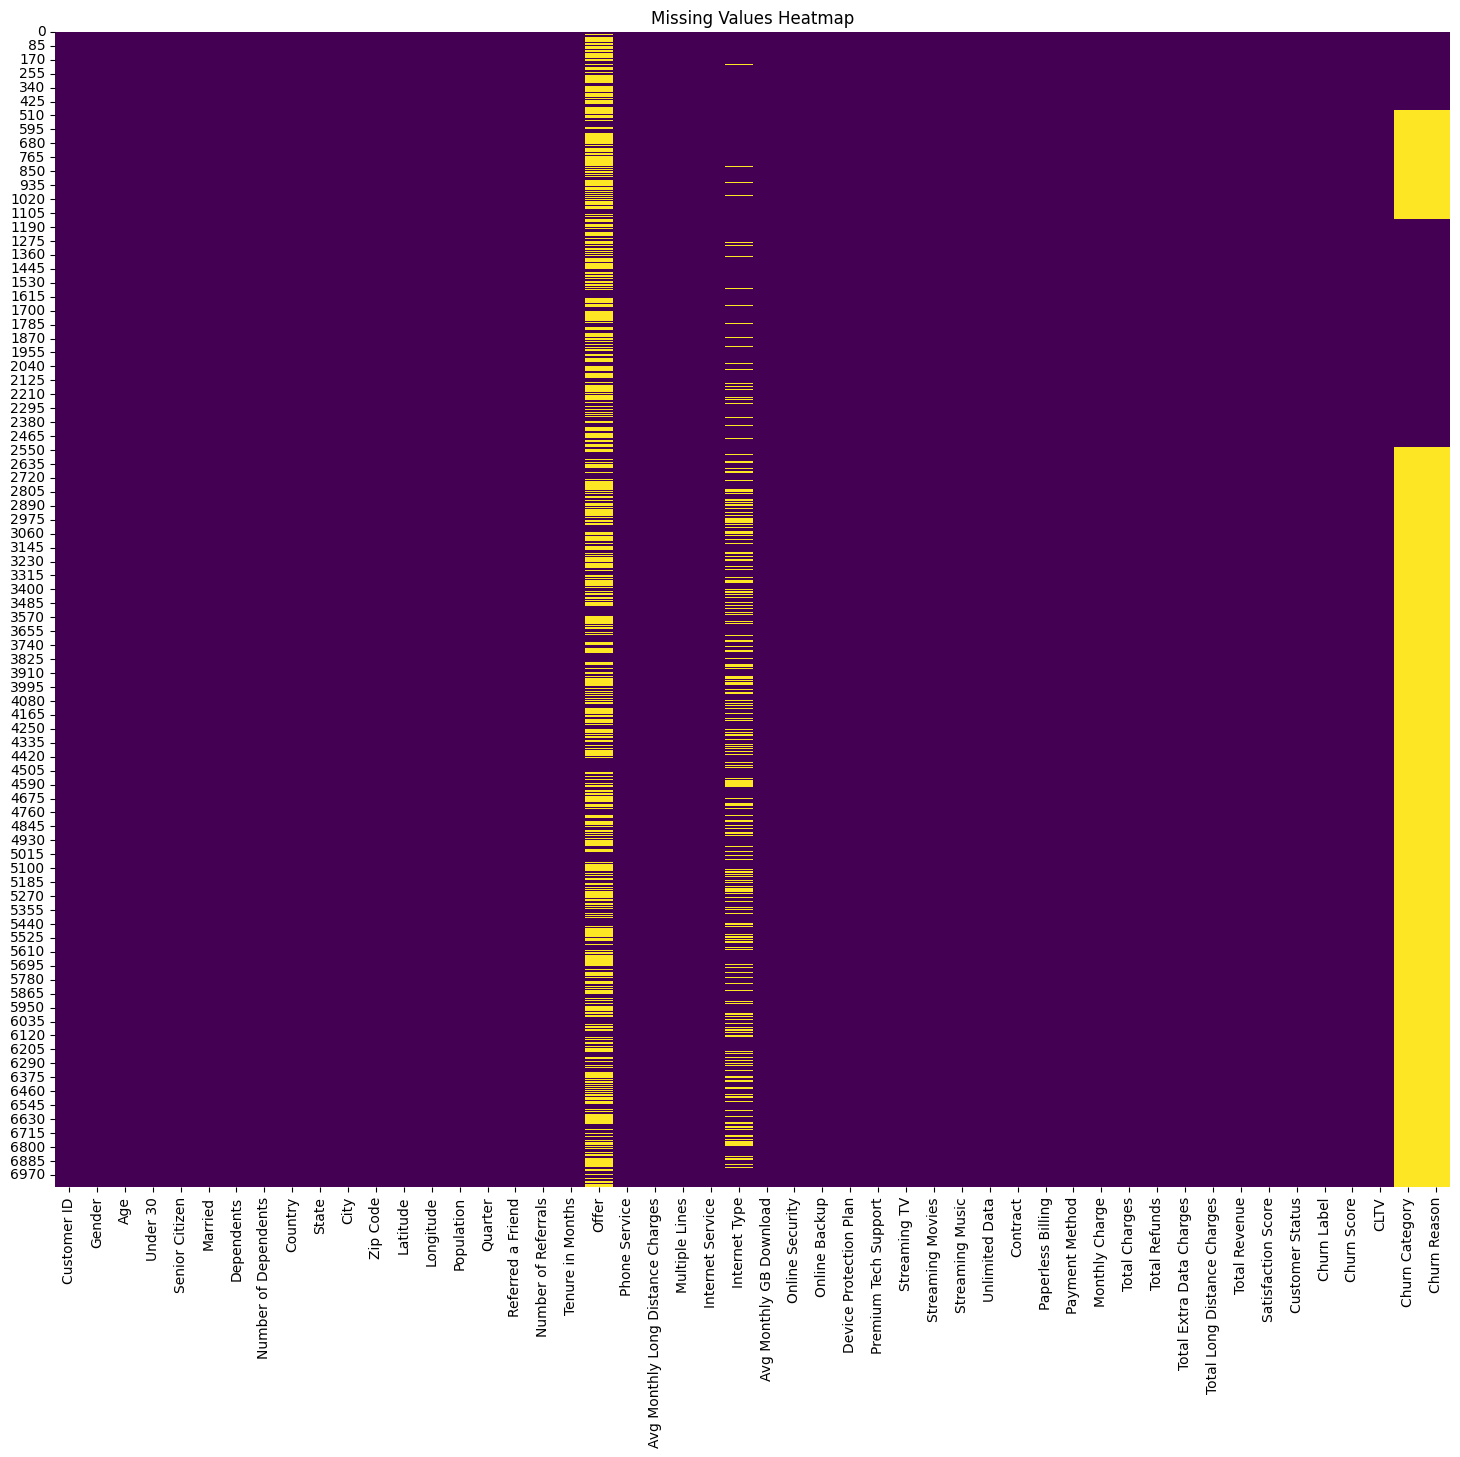

In [11]:
# Count of missing values per column
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values in Each Column:\n")
print(missing_values[missing_values > 0])

# Visualize missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## Step 3: Target Variable Distribution

In this step, we examine the distribution of the target variable — `Churn Label`.This helps us understand whether the dataset is balanced or imbalanced,which is important because many machine learning algorithms perform poorly on imbalanced data.
A class imbalance (e.g., much more "No" than "Yes") might require special techniques like resampling, class weights, or evaluation metrics like F1-score.

Churn Label Counts:
 Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


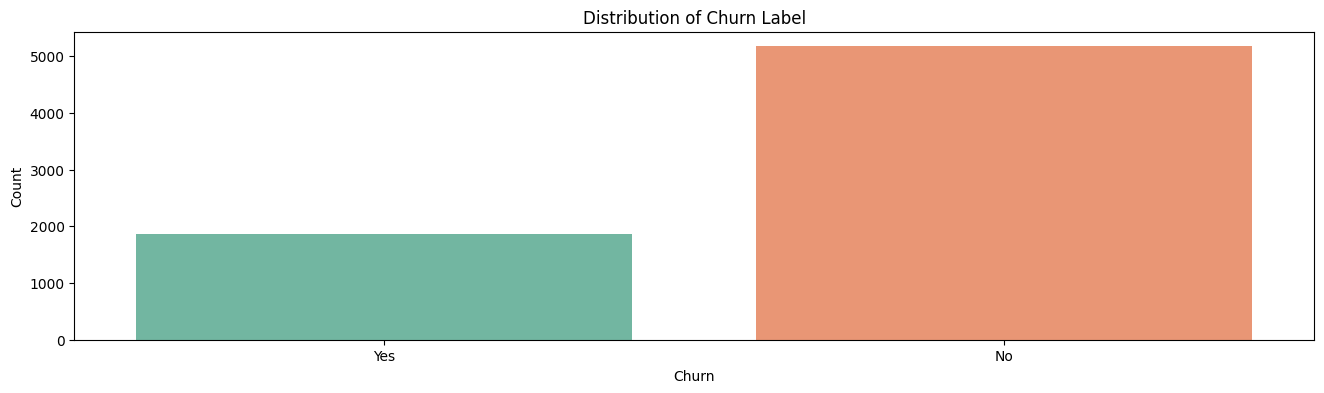


Churn Percentage:
 Churn Label
No     73.46
Yes    26.54
Name: count, dtype: float64


In [10]:
# Count of churn labels
churn_counts = df['Churn Label'].value_counts()
print("Churn Label Counts:\n", churn_counts)

# Plot the distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
sns.countplot(x='Churn Label', data=df, palette='Set2')
plt.title('Distribution of Churn Label')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Show churn ratio
churn_percent = churn_counts / len(df) * 100
print("\nChurn Percentage:\n", churn_percent.round(2))

## Step 4: Univariate Analysis — Categorical Features

Here we explore the individual distribution of categorical columns.This helps us understand the frequency of different values in features such as Contract Type, Internet Service, Payment Method, etc.  
By visualizing them, we can identify dominant categories, rare classes, and possibly redundant or low-variance features.

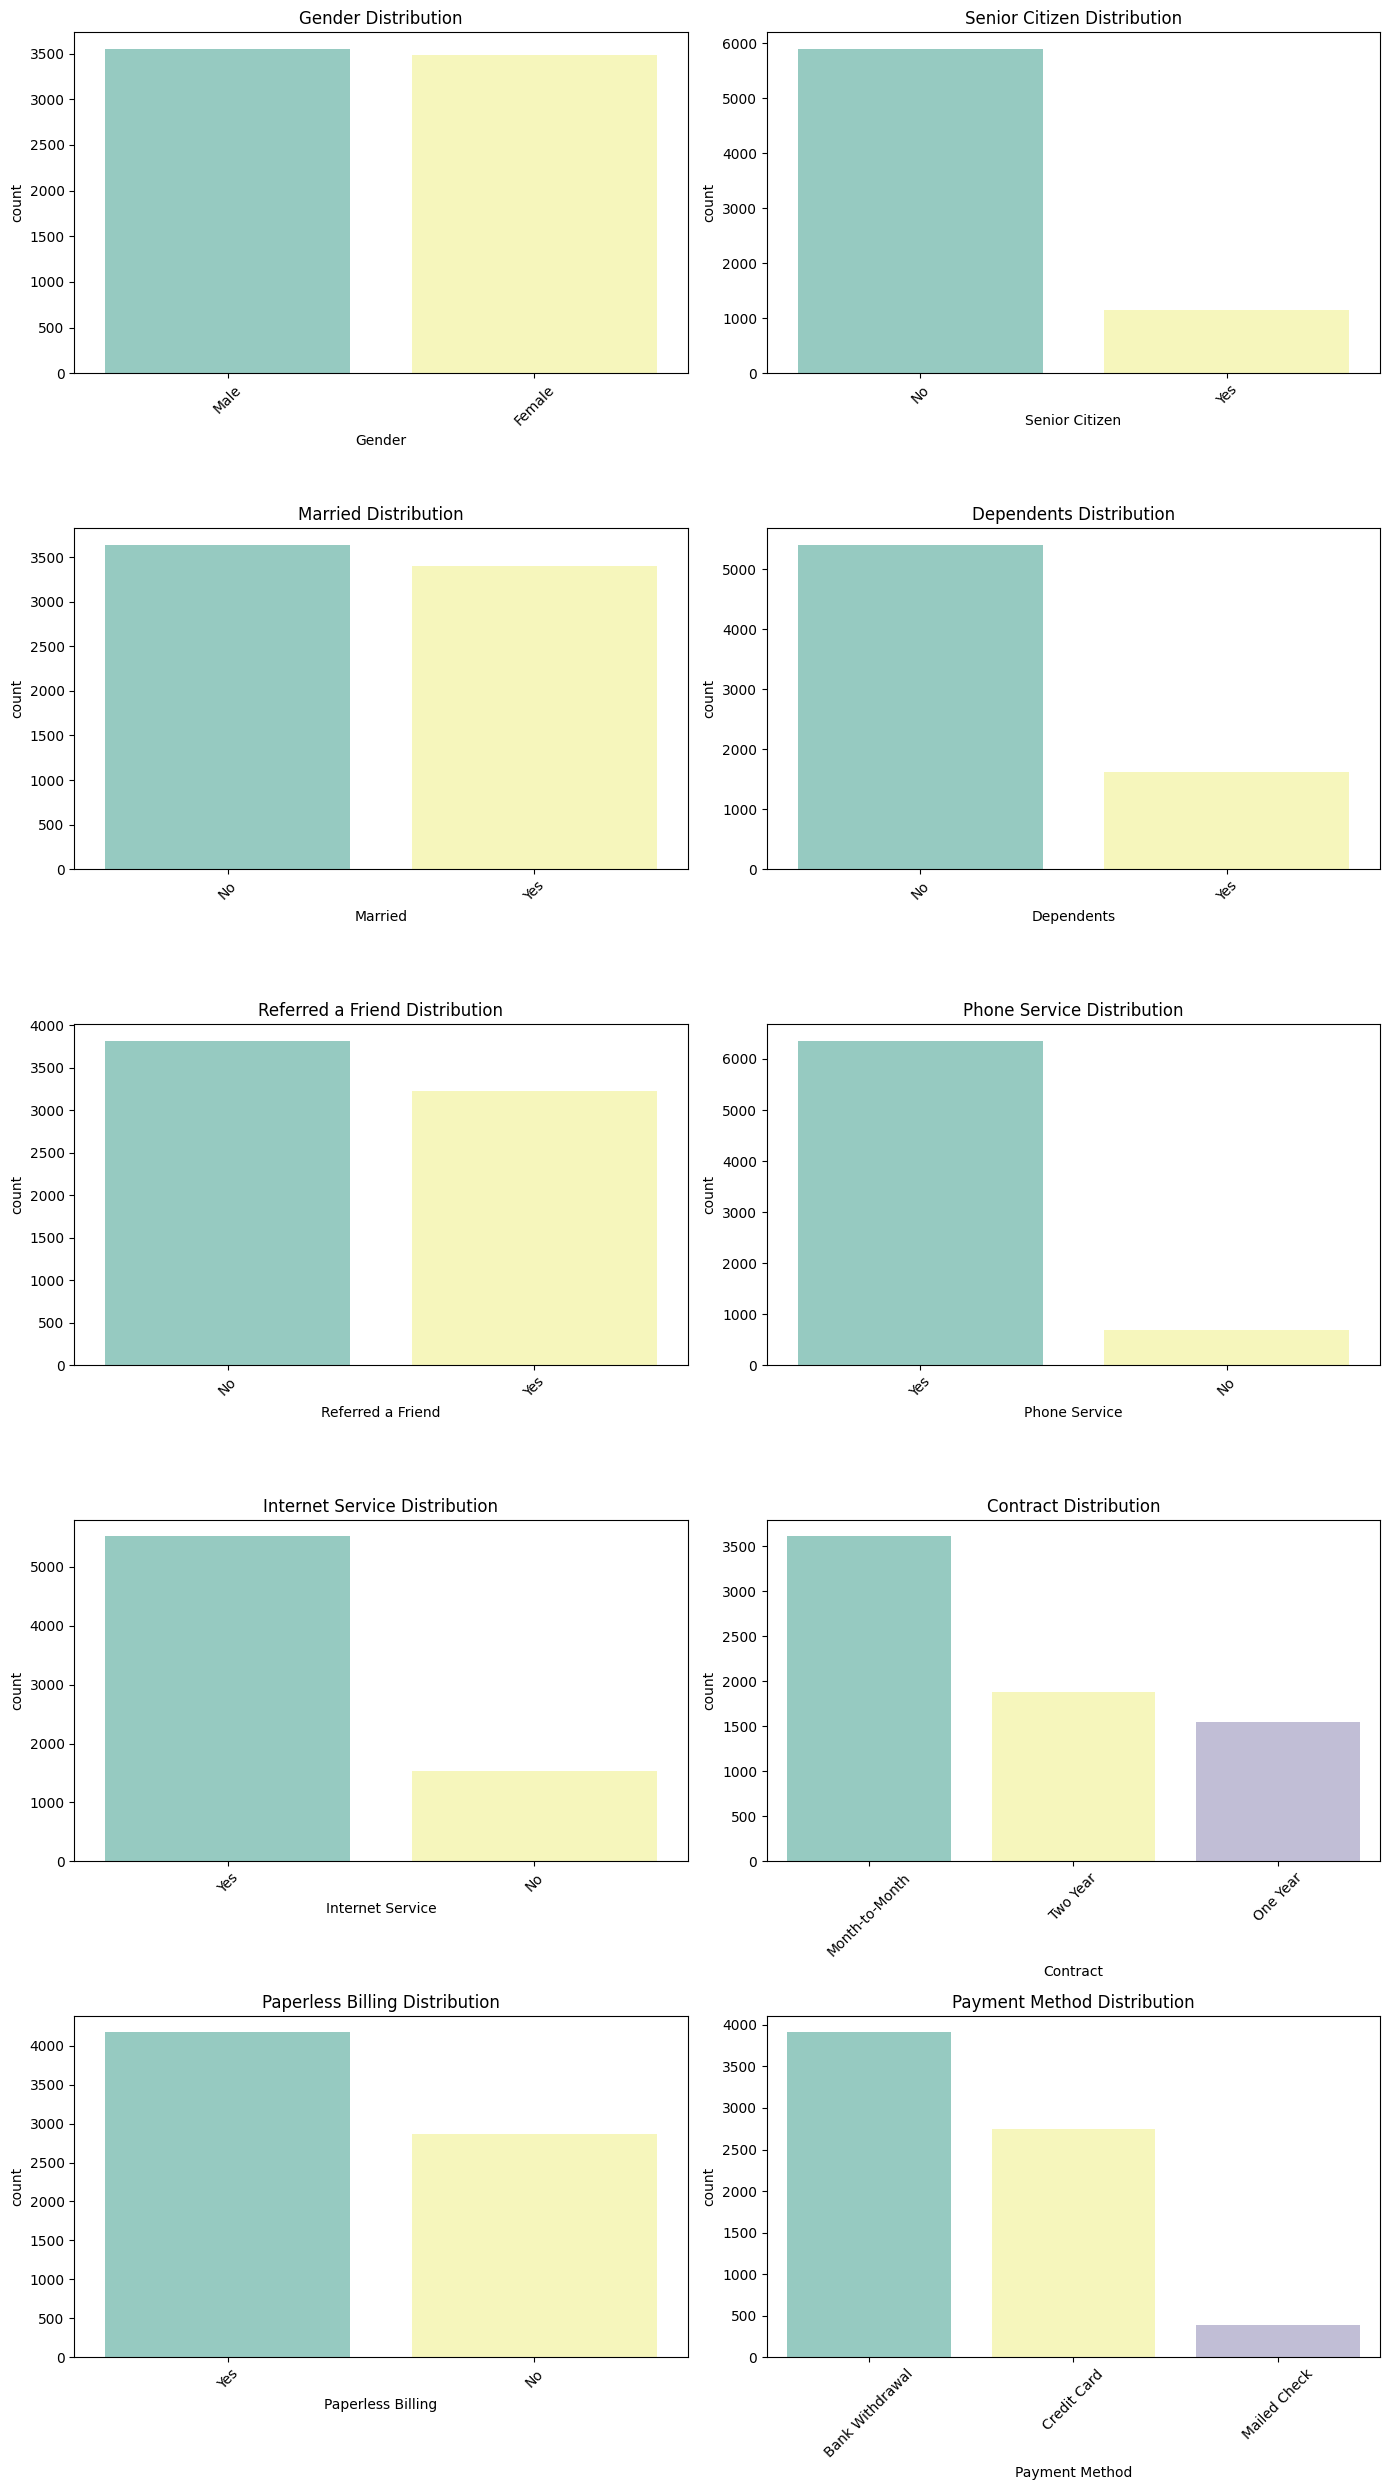

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = [
    'Gender', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend',
    'Phone Service', 'Internet Service', 'Contract', 'Paperless Billing',
    'Payment Method'
]

# Set up figure dimensions to accommodate subplots
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols
plt.figure(figsize=(14, 5 * n_rows))

for i, col in enumerate(categorical_cols, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set3', ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Step 5: Univariate Analysis — Numerical Features

In this step, we explore the distribution of key numerical variables such as usage metrics, charges, and tenure.We visualize their histograms and boxplots to identify skewness, outliers, and value ranges.  
Understanding these characteristics helps us decide on strategies like transformation, binning, or outlier treatment.

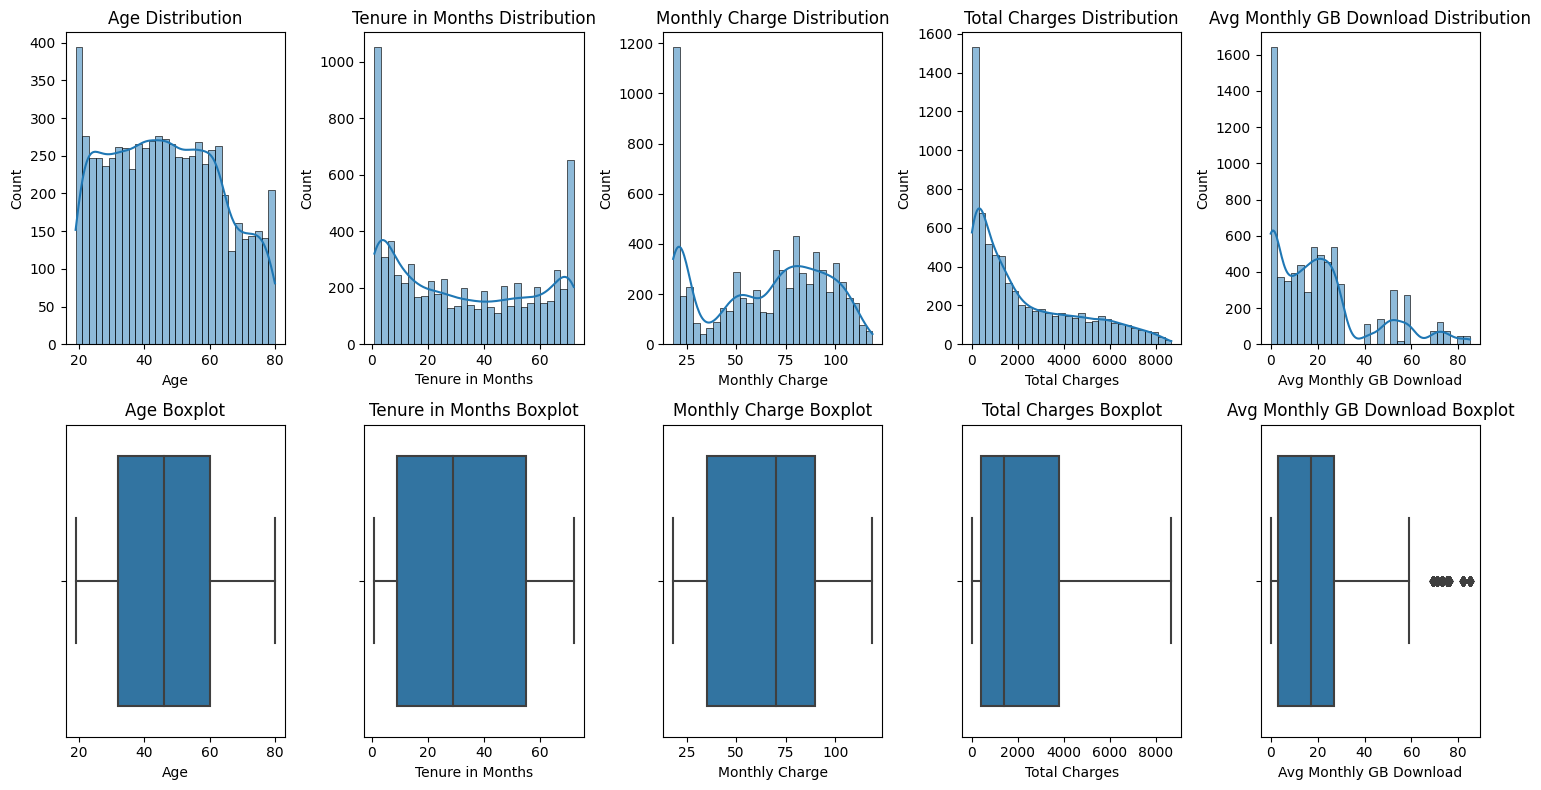

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few important numerical columns for visualization
numerical_cols = [
    'Age', 'Tenure in Months', 'Monthly Charge',
    'Total Charges', 'Avg Monthly GB Download'
]

# Plot histograms and boxplots
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_cols, 1):
    ax1 = plt.subplot(2, len(numerical_cols), i)
    sns.histplot(df[col], kde=True, bins=30, ax=ax1)
    ax1.set_title(f'{col} Distribution')
    
    ax2 = plt.subplot(2, len(numerical_cols), i + len(numerical_cols))
    sns.boxplot(x=df[col], ax=ax2)
    ax2.set_title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

## Step 6: Bivariate Analysis — Features vs. Churn

Now we examine how both categorical and numerical features relate to the `Churn Label`.This helps us understand which variables may be strong predictors of churn.For example, we compare distributions of `Contract`, `Monthly Charge`, etc.  
This step offers deeper insight into relationships and helps guide feature engineering and model selection.

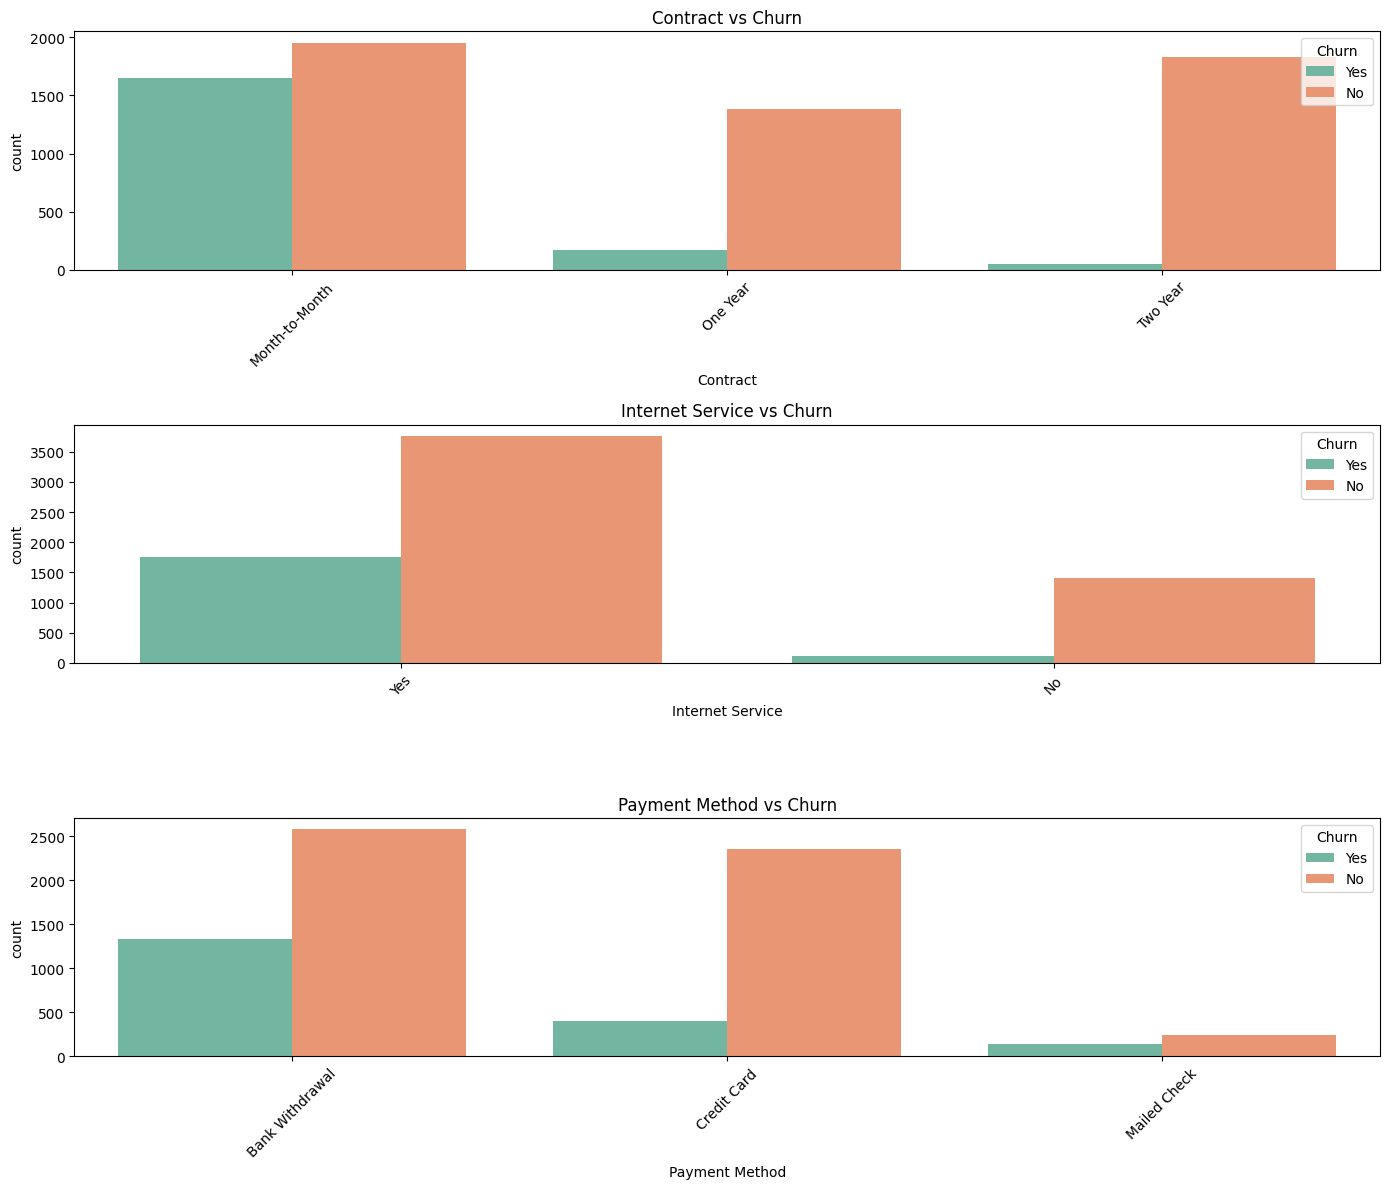

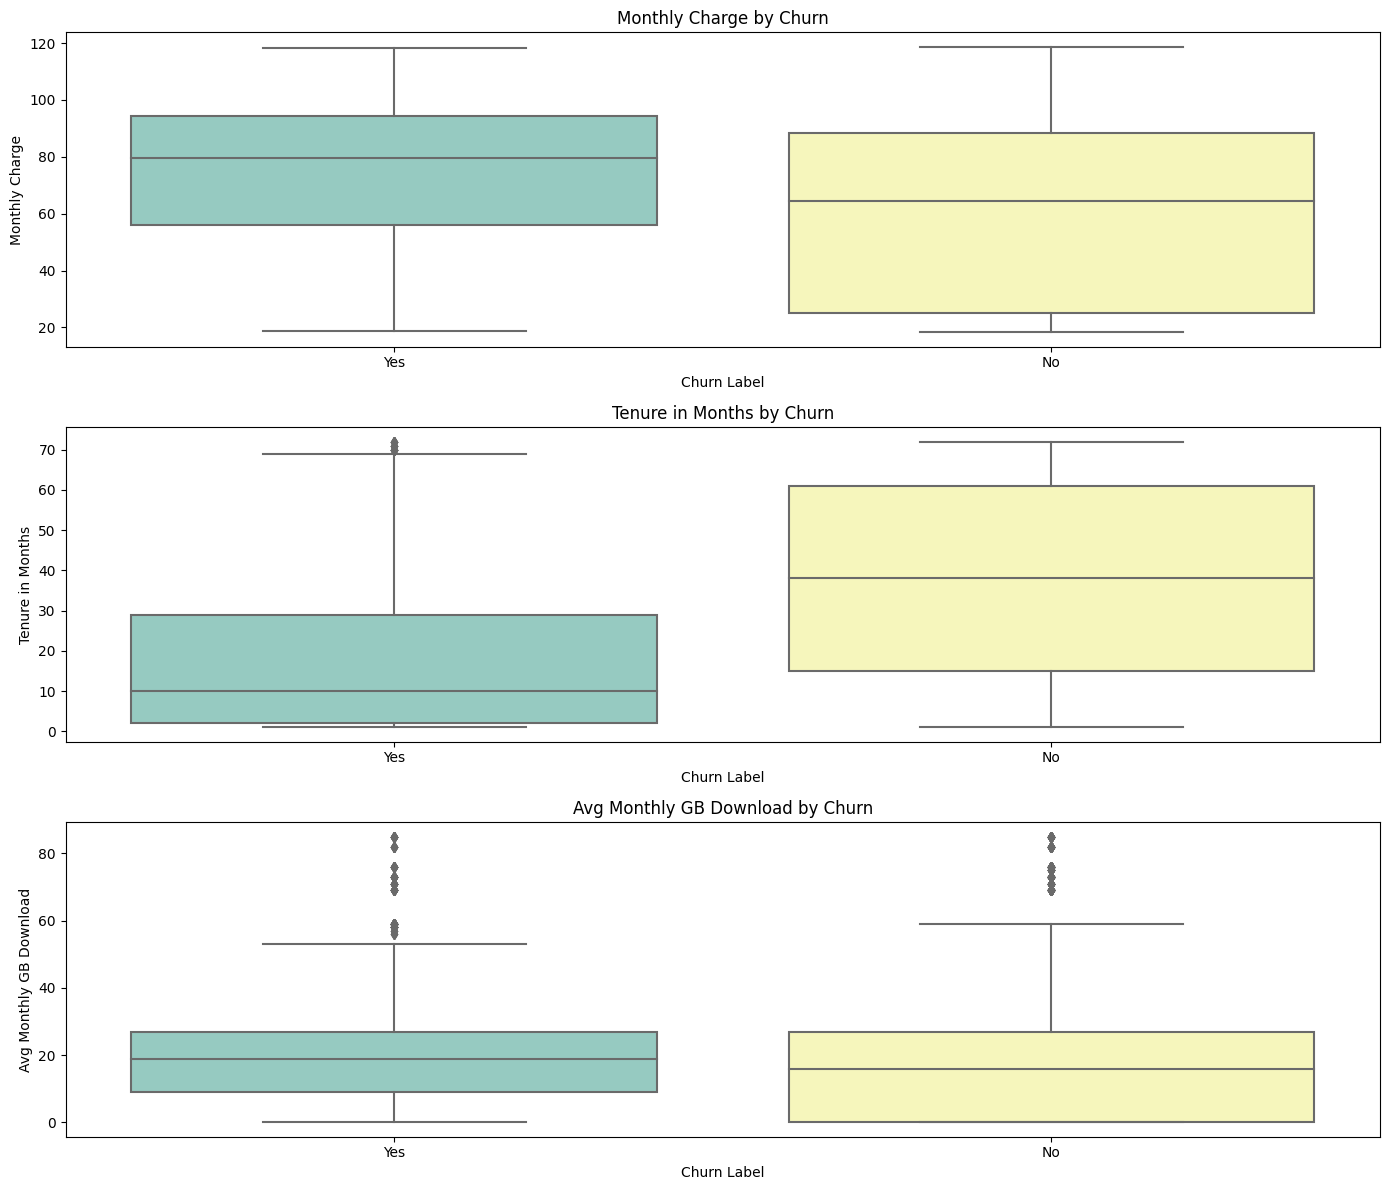

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Categorical vs Churn ----
cat_cols = ['Contract', 'Internet Service', 'Payment Method']
plt.figure(figsize=(14, 12))
for i, col in enumerate(cat_cols, 1):
    ax = plt.subplot(len(cat_cols), 1, i)
    sns.countplot(x=col, hue='Churn Label', data=df, palette='Set2', ax=ax)
    ax.set_title(f'{col} vs Churn')
    ax.legend(title='Churn', loc='upper right')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# ---- Numerical vs Churn ----
num_cols = ['Monthly Charge', 'Tenure in Months', 'Avg Monthly GB Download']
plt.figure(figsize=(14, 12))
for i, col in enumerate(num_cols, 1):
    ax = plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x='Churn Label', y=col, data=df, palette='Set3', ax=ax)
    ax.set_title(f'{col} by Churn')
plt.tight_layout()
plt.show()

## Step 7: Correlation Analysis

In this step, we examine correlations between numerical features and how they relate to each other. A correlation heatmap helps us:
- Identify pairs of highly correlated variables (potential multicollinearity)
- Spot features strongly associated with churn if we include `Churn Label` numeric representation
- Decide whether to drop, combine, or transform correlated columns

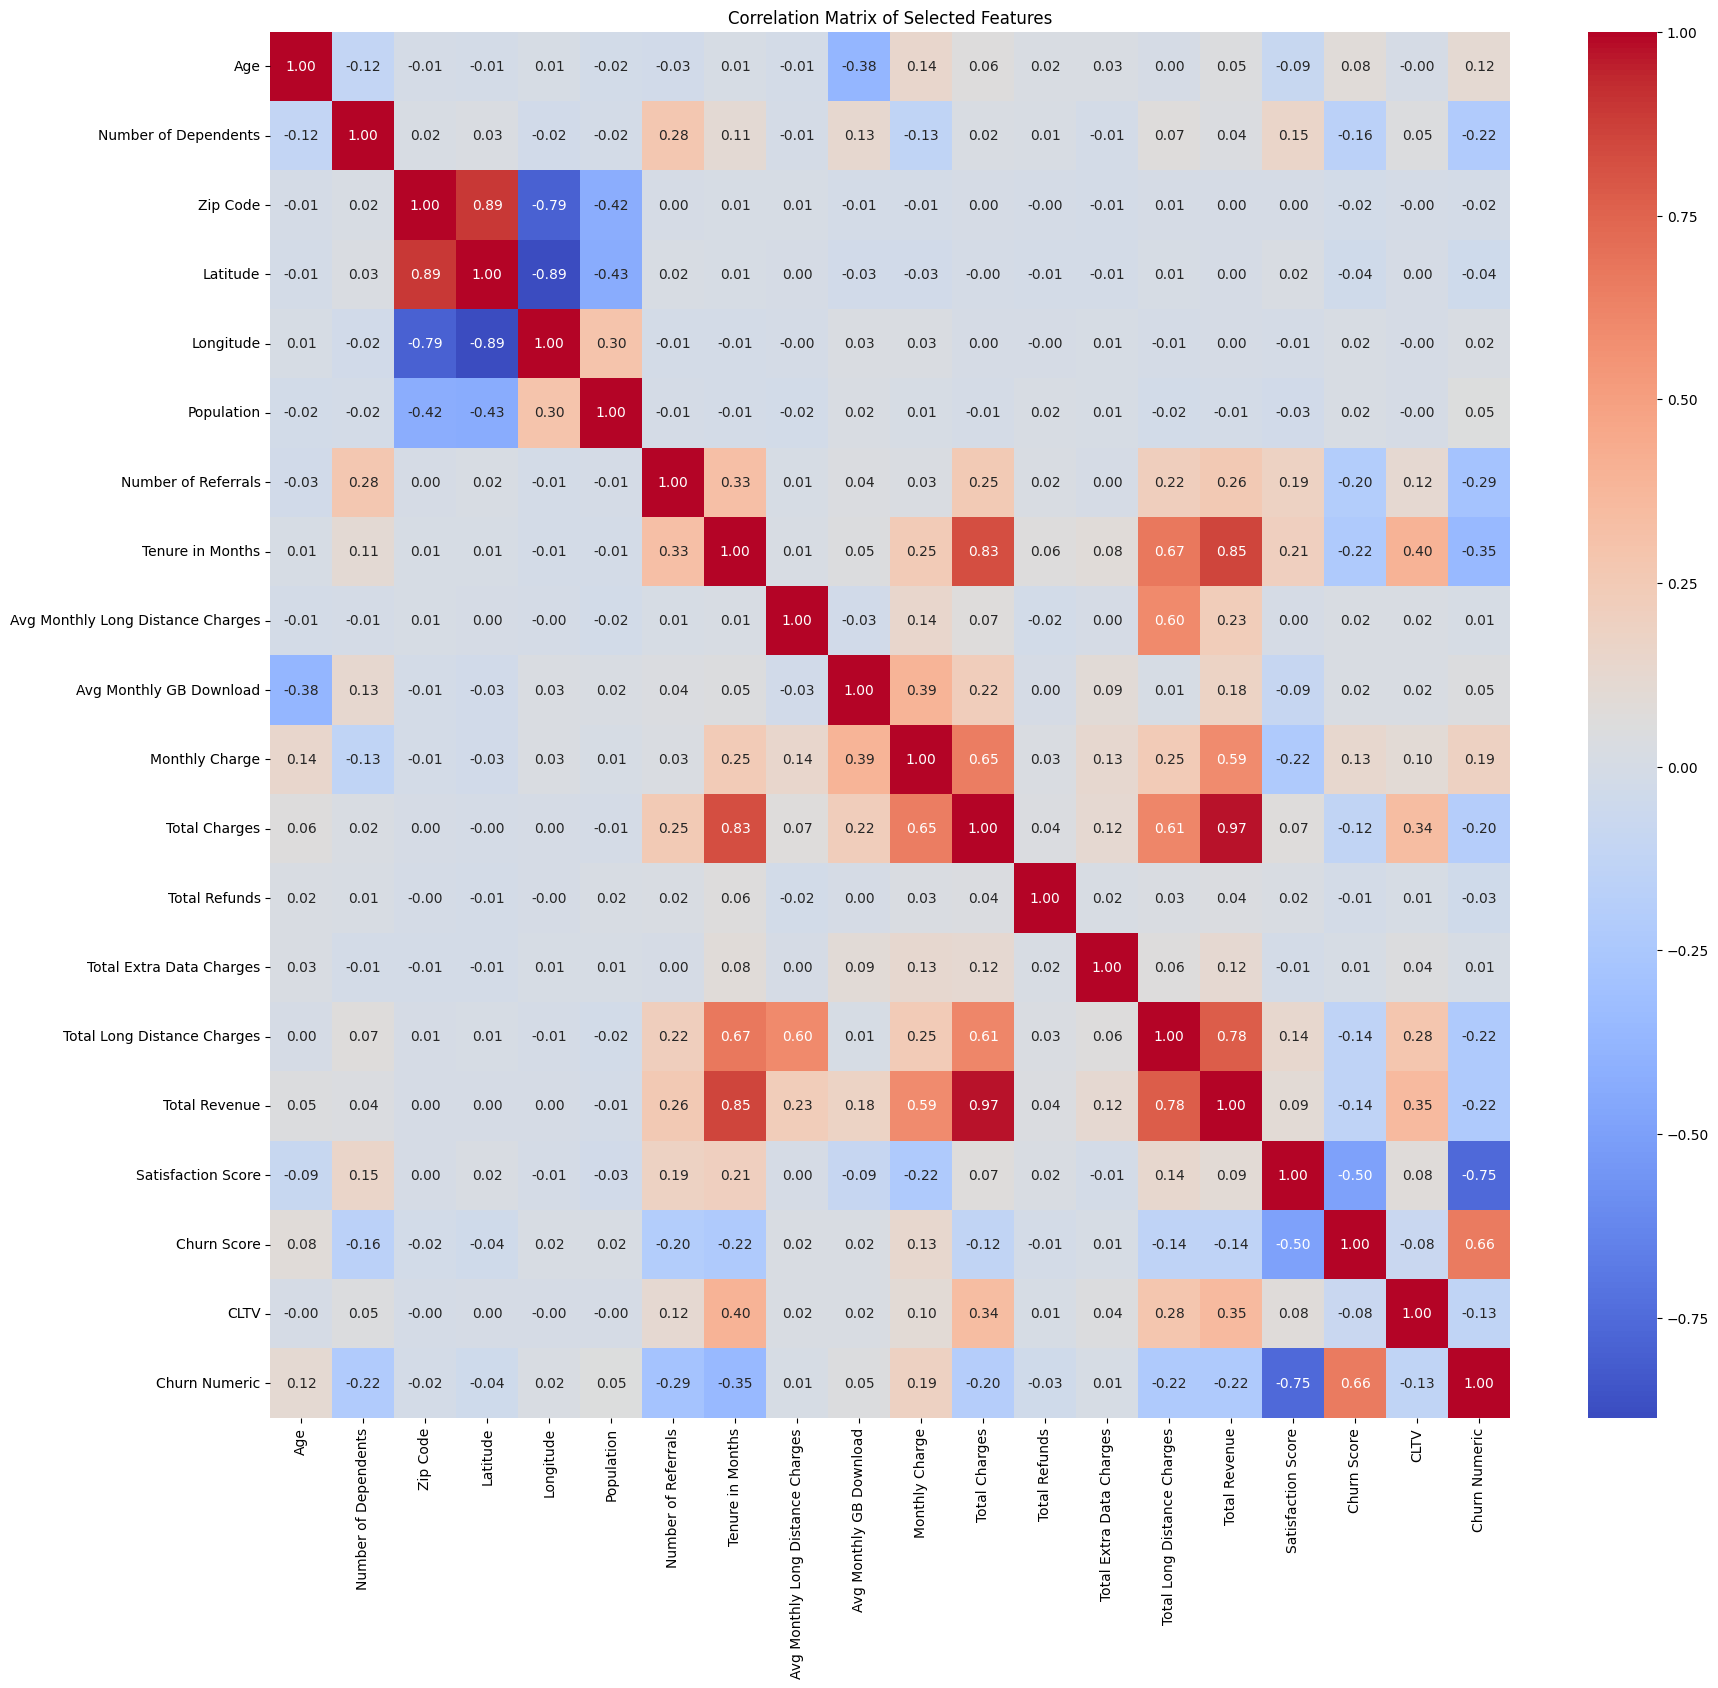

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, ensure churn is numeric for correlation analysis
df_corr = df.copy()
df_corr['Churn Numeric'] = df_corr['Churn Label'].map({'No': 0, 'Yes': 1})

# Select only numerical columns + churn numeric
num_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns.tolist()    # Use this for complete correlation matrix
# Optionally limit columns for readability
select_cols = [
    'Age', 'Tenure in Months', 'Monthly Charge',
    'Total Charges', 'Avg Monthly GB Download',
    'Churn Numeric'
]

plt.figure(figsize=(20, 18))
corr_matrix = df_corr[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Data Cleaning

After doing some basic EDA of the numerical and cayegorical features, we have a decent understanding of our data. Next step involves data pre-processing.

## Step 1: Handling Missing Values

We begin by identifying and handling missing values in the dataset. Some missing values may be logical (e.g., no internet service = missing internet type). We'll impute or fill values based on business logic and data distribution to avoid losing important records during model training.

#### Handling Missing Values in 'Offer' Column

The 'Offer' column represents promotional offers received by customers. Missing values here likely indicate that no offer was received. We'll fill these missing values with the label 'None' to reflect that absence clearly.

In [3]:
# Check for missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing Values:\n", missing)

# Example Fix: If Internet Type is missing when Internet Service is "No"
df.loc[(df['Internet Service'] == 'No') & (df['Internet Type'].isnull()), 'Internet Type'] = 'No Internet'

# Confirm fix
print("\nFixed Internet Type nulls:", df['Internet Type'].isnull().sum())


# Check unique values and count nulls in Offer
print("Unique Offer Values:\n", df['Offer'].value_counts(dropna=False))

# Impute missing values in Offer column
df['Offer'] = df['Offer'].fillna('None')

# Confirm fix
print("\nMissing values in 'Offer' after fill:", df['Offer'].isnull().sum())

Missing Values:
 Churn Category    5174
Churn Reason      5174
Offer             3877
Internet Type     1526
dtype: int64

Fixed Internet Type nulls: 0
Unique Offer Values:
 Offer
NaN        3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: count, dtype: int64

Missing values in 'Offer' after fill: 0


## Step 2. Handling Outliers

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import zscore


def summarize_outliers(df: pd.DataFrame, method: str = 'iqr', z_threshold: float = 3) -> pd.DataFrame:
    """
    Identifies and summarizes outliers in the numerical columns of a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        method (str): The method to use for outlier detection. 
                      Options are 'iqr' (default) or 'zscore'.
        z_threshold (float): The Z-score threshold to use if method is 'zscore'. 
                             Defaults to 3.

    Returns:
        pd.DataFrame: A DataFrame summarizing the outliers for each column,
                      including counts, percentages, bounds, and examples.
    """
    numerical_cols = df.select_dtypes(include=np.number).columns
    summary_list = []

    for col in numerical_cols:
        col_data = df[col].dropna()
        n_points = len(col_data)
        
        if n_points < 3: # Not enough data to check for outliers
            continue

        if method == 'iqr':
            q1 = col_data.quantile(0.25)
            q3 = col_data.quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
            
        elif method == 'zscore':
            mean = col_data.mean()
            std = col_data.std()
            lower_bound = mean - z_threshold * std
            upper_bound = mean + z_threshold * std
            z_scores = zscore(col_data)
            outliers = col_data[np.abs(z_scores) > z_threshold]
        
        else:
            raise ValueError("Method not recognized. Use 'iqr' or 'zscore'.")

        if not outliers.empty:
            outlier_count = len(outliers)
            outlier_percent = (outlier_count / n_points) * 100
            # Show up to 3 example outliers
            example_outliers = outliers.head(3).tolist()
            if len(outliers) > 3:
                example_outliers.append('...')
            
            summary_list.append({
                'Feature': col,
                '# Outliers': outlier_count,
                '% Outliers': f"{outlier_percent:.2f}%",
                'Lower Bound': f"{lower_bound:.2f}",
                'Upper Bound': f"{upper_bound:.2f}",
                'Outlier Examples': example_outliers
            })

    if not summary_list:
        print(f"No outliers found using the '{method}' method.")
        return pd.DataFrame()

    summary_df = pd.DataFrame(summary_list).set_index('Feature')
    return summary_df

# ==============================================================================
# --- How to Use the Improved Function ---
# ==============================================================================

print("="*60)
print("🔍 Outlier Summary (IQR Method)")
print("="*60)
iqr_summary = summarize_outliers(df, method='iqr')
print(iqr_summary)


print("\n\n" + "="*60)
print("🔍 Outlier Summary (Z-Score Method, Threshold=3)")
print("="*60)
zscore_summary = summarize_outliers(df, method='zscore', z_threshold=3)
print(zscore_summary)

🔍 Outlier Summary (IQR Method)
                             # Outliers % Outliers Lower Bound Upper Bound  \
Feature                                                                      
Number of Dependents               1627     23.10%        0.00        0.00   
Population                           57      0.81%   -48327.50    86796.50   
Number of Referrals                 676      9.60%       -4.50        7.50   
Avg Monthly GB Download             362      5.14%      -33.00       63.00   
Total Refunds                       525      7.45%        0.00        0.00   
Total Extra Data Charges            728     10.34%        0.00        0.00   
Total Long Distance Charges         196      2.78%    -1610.29     2871.93   
Total Revenue                        21      0.30%    -5687.69    11094.45   
Satisfaction Score                  922     13.09%        1.50        5.50   

                                                       Outlier Examples  
Feature                             

In [5]:
# List of numerical columns to apply IQR capping (excluding Satisfaction Score if it's discrete)
columns_to_cap = ['Number of Dependents', 'Population'                          
,'Number of Referrals'              
,'Avg Monthly GB Download'               
,'Total Refunds'                        
,'Total Extra Data Charges'              
,'Total Long Distance Charges'         
,'Total Revenue'                          
,'Satisfaction Score']

# Apply IQR capping
for column in columns_to_cap:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: min(max(x, lower_bound), upper_bound))

## Step 3. Handling Duplicates
Duplicate rows can skew the results of your analysis and model training.

In [6]:
# Identify and remove duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


## Step 4. Handling Irrelevant or Redundant Columns

Some features are either identifiers (like `Customer ID`), post-churn labels (like `Churn Reason`), or redundant (like `Under 30`, which we can derive from `Age`). These are not useful for churn prediction and will be dropped.

In [7]:
columns_to_drop = [
    'Customer ID', 'Under 30', 'Senior Citizen', 'Customer Status',
    'Churn Category', 'Churn Reason',
    'Country', 'State'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Handle rare categories (appear less than 100 times)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    freq = df[col].value_counts()
    rare_categories = freq[freq < 100].index
    df[col] = df[col].apply(lambda x: 'Other' if x in rare_categories else x)

# Feature Engineering
In this sextion, we'll:

    1. Create new informative features
    2. Combine or simplify existing features
    3. Prepare binary features for encoding or scaling if needed

## Step 1. Creating a Total Services Feature

Customers who subscribe to more services may have different churn behaviors. We'll create a `Total Services` feature that counts how many add-on services a customer is using.


In [8]:
# List of service-related columns (binary Yes/No)
service_cols = [
    'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
    'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
    'Streaming Movies', 'Streaming Music'
]

df['Total Services'] = (df[service_cols] == 'Yes').sum(axis=1)

## Step 2. Creating a Combined Feature: Has Tech Support or Protection

We'll combine `Premium Tech Support` and `Device Protection Plan` into a new feature. This tells us if a customer is receiving some form of technical protection or support — which could correlate with lower churn.


In [9]:
# Define the columns of interest
tech_cols = ['Premium Tech Support', 'Device Protection Plan']

# Check if 'Yes' exists in any of the specified columns for each row.
# The .any(axis=1) performs a logical OR operation across the columns.
has_either_service = (df[tech_cols] == 'Yes').any(axis=1)

# Create the new feature by converting the boolean result (True/False) to an integer (1/0)
df['Has Tech Support or Protection'] = has_either_service.astype(int)

## Step 3. Creating a Service Level Feature

We'll convert the `Total Services` column into categories: Low, Medium, and High. This simplifies the model's understanding of customer engagement and may help reveal patterns in churn.

In [10]:
# Create categorical feature based on Total Services
def map_service_level(services_count):
    if services_count <= 3:
        return 'Low'
    elif services_count <= 6:
        return 'Medium'
    else:
        return 'High'

df['Service Level'] = df['Total Services'].apply(map_service_level)

## Step 4. Creating a Combined Feature: Is Senior and On Contract

We’ll create a new binary feature that identifies customers who are senior citizens and have a contract type other than "Month-to-Month". This can help capture interactions between age and contract type that influence churn.


In [11]:
# Define the condition: Senior + non-month-to-month contract
df['Is Senior and On Contract'] = (
    (df['Age'] > 50) & (df['Contract'] != 'Month-to-Month')
).astype(int)

## Step 5. Feature Selection using Mutual Information

In this block, we calculate Mutual Information (MI) scores between each feature and the target variable (Churn Label). MI measures how much knowing a feature reduces uncertainty about the target. Higher MI indicates a more useful feature for predicting churn. This helps us:

    * Identify which features carry the most information about churn.

    * Consider dropping features with low or no MI scores.

    * Decide what to prioritize for modeling.

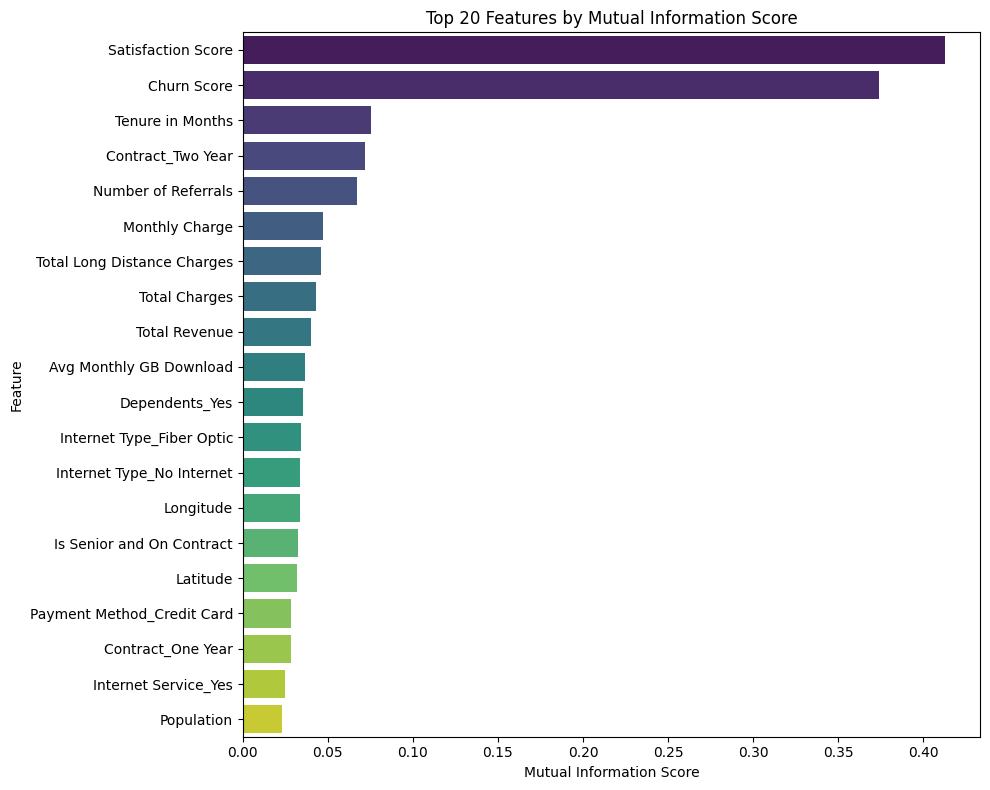

In [12]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure target column is numeric
target = df['Churn Label'].map({'Yes': 1, 'No': 0})

# Select only numeric and already encoded categorical features
# Skip irrelevant columns like Customer ID, Zip Code, etc.
X = df.drop(columns=['Churn Label', 'Customer ID', 'Zip Code'], errors='ignore')

# If some features are still categorical, encode them
X_encoded = pd.get_dummies(X, drop_first=True)

# Calculate Mutual Information scores
mi_scores = mutual_info_classif(X_encoded, target, discrete_features='auto', random_state=42)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

# Display top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(x='MI Score', y='Feature', data=mi_df.head(20), palette='viridis')
plt.title('Top 20 Features by Mutual Information Score')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Step 6. Feature Engineering with K-Means Clustering

In this block, we apply K-Means clustering on selected numerical features to identify hidden customer segments. These segments (clusters) are added as a new categorical feature. This technique can:

    Capture complex patterns not obvious in raw features.

    Group customers with similar behavior, potentially tied to churn risk.

This step adds more signal to the dataset and can help the model differentiate between different customer personas.

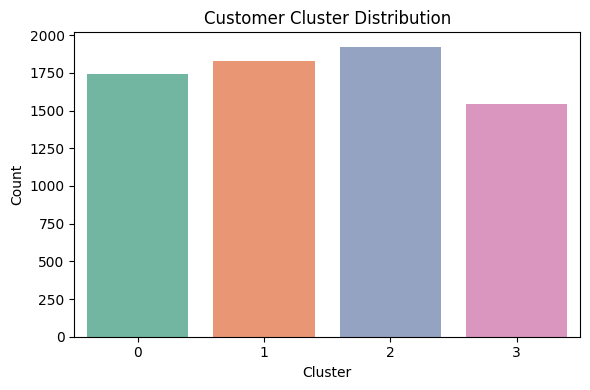

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features relevant for segmentation
features_for_clustering = [
    'Tenure in Months', 'Monthly Charge', 'Total Revenue',
    'Avg Monthly GB Download', 'Satisfaction Score', 'Churn Score'
]

# Ensure these features are scaled
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_for_clustering])

# Run KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Customer Cluster'] = kmeans.fit_predict(scaled_features)

# Optional: visualize cluster distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Customer Cluster', data=df, palette='Set2')
plt.title('Customer Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

What the Code Did:

    1. Selected key numerical features (like tenure, revenue, charges, downloads, satisfaction).

    2. Scaled those features using StandardScaler so that all values have similar range — very important for clustering.

    3. Applied K-Means Clustering with 4 clusters to group customers into 4 different behavior-based segments.

    4. Created a new column called 'Customer Cluster', assigning each customer to one of these 4 clusters (0, 1, 2, or 3).

    5. Visualized how many customers are in each cluster using a bar chart.

So now, every customer belongs to a segment/group that was formed based on behavior patterns.

**Even though the values are numbers (0, 1, 2, 3), they don't have true numeric meaning. Cluster 0 is not “less” than Cluster 1 — they’re just labels.**

So we’ll:

    * One-hot encode this column if your model is not tree-based (e.g., Logistic Regression, SVM, Neural Net).

    * Or leave it as-is if using tree-based models (e.g., Random Forest, XGBoost), since they handle categorical numbers well.

# Categorical Encoding

## Step 1. One-Hot Encoding for Categorical Features

One-Hot Encoding is used for categorical variables that have **no inherent order** (nominal features), especially those with **low cardinality**. This method converts each category into a separate binary column (`0` or `1`) which helps machine learning models understand categorical information.

In this step, we'll apply One-Hot Encoding to columns like `Gender`, `Married`, `Phone Service`, and similar binary/multi-category features. We'll use `OneHotEncoder` from `sklearn` with `sparse=False` to get a readable DataFrame.

This block is self-contained and produces a new DataFrame containing one-hot encoded features.

**But first**, let's do a quick cardinality check.


In [14]:
# Threshold for high cardinality
high_card_threshold = 10

# Select object or category dtype columns
categorical_cols = df.select_dtypes(include='object').columns

# Count unique values
cardinality_report = df[categorical_cols].nunique().sort_values(ascending=False)

# Display only high cardinality columns
high_card_cols = cardinality_report[cardinality_report > high_card_threshold]
print("🔍 High Cardinality Columns (unique values > 10):")
print(high_card_cols)

🔍 High Cardinality Columns (unique values > 10):
Series([], dtype: int64)


**Since no object or category dtype column has high cardinality, we can apply One-Hot Encoding on all of them.**

In [15]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assume 'df' is your pre-existing DataFrame

# Select object or category dtype columns
one_hot_cols = df.select_dtypes(include='object').columns

# Exclude the target label 'Churn Label' from the list of columns to encode
one_hot_cols = one_hot_cols.drop('Churn Label')

# Initialize encoder
# sparse_output=False is used in newer versions of scikit-learn instead of sparse=False
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the selected columns
one_hot_encoded = ohe.fit_transform(df[one_hot_cols])

# Create a new DataFrame with the encoded variables
# The column names are generated based on the original feature names
ohe_df = pd.DataFrame(one_hot_encoded, columns=ohe.get_feature_names_out(one_hot_cols))

# ohe_df might have a default integer index, so we align it with the original df's index
ohe_df.index = df.index

# Drop the original categorical columns from the main DataFrame
df = df.drop(columns=one_hot_cols)

# Concatenate the original DataFrame with the new one-hot encoded DataFrame
df = pd.concat([df, ohe_df], axis=1)

# Preview the resulting DataFrame
df.head()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,...,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Service Level_High,Service Level_Low,Service Level_Medium
0,78,0.0,90022,34.023810,-118.156582,68701.0,0.0,1,0.00,8.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,74,0.0,90063,34.044271,-118.185237,55668.0,1.0,8,48.85,17.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,71,0.0,90065,34.108833,-118.229715,47534.0,0.0,18,11.33,52.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,78,0.0,90303,33.936291,-118.332639,27778.0,1.0,25,19.76,12.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,80,0.0,90602,33.972119,-118.020188,26265.0,1.0,37,6.33,14.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


## Step 2.  Create 'Satisfaction Category' from 'Satisfaction Score'

The Satisfaction Score is a numeric feature ranging from 1 to 5. To apply ordinal encoding, we first convert this into an ordered categorical column called 'Satisfaction Category'. This will help capture customer sentiment as 'Low', 'Medium', or 'High'.

In [16]:
# Create Satisfaction Category column
df['Satisfaction Category'] = pd.cut(
    df['Satisfaction Score'],
    bins=[0, 2, 3, 5],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

## Step 3. Ordinal Encoding for Ordered Categories

We use Ordinal Encoding for features where the category values have a logical order. This encoding assigns integer values that preserve the ranking. For example, "Month-to-month" < "One year" < "Two year".

In [17]:
from sklearn.preprocessing import OrdinalEncoder

# Define columns and their order
ordinal_cols = ['Satisfaction Category']
ordinal_order = [
    ['Low', 'Medium', 'High']
]

# Create encoder
ordinal_encoder = OrdinalEncoder(categories=ordinal_order)

# Encode and assign back
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])

# Scaling Numerical Features
Why Scaling?

We scale numerical features so that models sensitive to magnitude (like KNN, SVM, logistic regression, etc.) don’t get biased by large values like Total Revenue compared to small ones like Satisfaction Score.

We'll use StandardScaler, which standardizes to mean = 0 and std = 1.

In [18]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns (excluding the target)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [19]:
df.head()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,...,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Service Level_High,Service Level_Low,Service Level_Medium,Satisfaction Category
0,1.880110,0.0,-1.865778,-0.880463,0.742757,2.230171,-0.678700,-1.278988,-1.486303,-0.631738,...,-0.604088,-0.829798,0.829798,0.895399,-0.800122,-0.240469,-0.428135,0.968823,-0.700641,-0.280158
1,1.641292,0.0,-1.843695,-0.872175,0.729456,1.606881,-0.302878,-0.993743,1.676120,-0.153561,...,-0.604088,-0.829798,0.829798,-1.116820,1.249809,-0.240469,-0.428135,0.968823,-0.700641,-0.280158
2,1.462179,0.0,-1.842618,-0.846023,0.708810,1.217880,-0.678700,-0.586250,-0.752828,1.706018,...,-0.604088,-0.829798,0.829798,0.895399,-0.800122,-0.240469,-0.428135,-1.032180,1.427265,-1.597349
3,1.880110,0.0,-1.714429,-0.915913,0.661033,0.273069,-0.302878,-0.301005,-0.207092,-0.419215,...,-0.604088,-0.829798,0.829798,0.895399,-0.800122,-0.240469,-0.428135,-1.032180,1.427265,-1.597349
4,1.999519,0.0,-1.553385,-0.901401,0.806071,0.200711,-0.302878,0.187986,-1.076516,-0.312954,...,-0.604088,-0.829798,0.829798,0.895399,-0.800122,-0.240469,-0.428135,0.968823,-0.700641,-1.597349


# Modeling Phase

## Step 1. Baseline Model — Logistic Regression

In this block, we build our baseline model using Logistic Regression. The purpose is to establish a reference point for model performance before we apply more complex algorithms. Logistic Regression is simple, interpretable, and performs well on linearly separable problems, making it ideal for a baseline.

Steps in this block:

    1. Train-Test Split: We split our cleaned and preprocessed data into training and testing sets to evaluate model generalization.

    2. Model Training: A Logistic Regression model is trained on the training data.

    3. Prediction: We generate predictions and probabilities on the test set.

    4. Evaluation: We evaluate the model using accuracy, precision, recall, F1-score, confusion matrix, and ROC-AUC score to measure model's performance.

    5. Visualization: We plot the ROC curve to visually assess classification performance.

This section helps us benchmark model performance before proceeding to tree-based models and hyperparameter tuning.

Classification Report:
               precision    recall  f1-score   support

          No       0.99      0.99      0.99      1035
         Yes       0.97      0.97      0.97       374

    accuracy                           0.98      1409
   macro avg       0.98      0.98      0.98      1409
weighted avg       0.98      0.98      0.98      1409

Confusion Matrix:
 [[1025   10]
 [  13  361]]
ROC-AUC Score: 0.9986876437004314


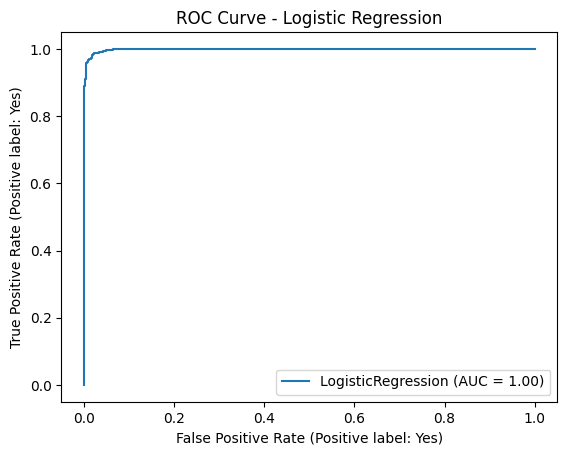

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# =========================
# 1. Train-Test Split
# =========================
X = df.drop(columns=['Churn Label'])  # Features
y = df['Churn Label']                # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# =========================
# 2. Train Logistic Regression
# =========================
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# =========================
# 3. Predictions
# =========================
y_pred = lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)[:, 1]

# =========================
# 4. Evaluation
# =========================
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Plot ROC Curve
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()


## Step 2. Interpretation of Logistic Regression Results
📊 Classification Report (Precision, Recall, F1-score):

Class 'No' (Customer did NOT churn)

    - Precision (0.99): 99% of customers predicted as not churned were actually not churned.

    - Recall (0.99): 99% of all actual non-churned customers were correctly identified.

    - F1-score (0.99): Excellent balance between precision and recall.

Class 'Yes' (Customer DID churn)

       - Precision (0.97): 97% of predicted churners were truly churners.

       - Recall (0.97): 97% of actual churners were successfully caught by the model.

       - F1-score (0.97): Again, strong balance between catching churners and avoiding false alarms.

    Accuracy (0.98): Overall, the model correctly predicted 98% of all customers, which is excellent.

🔲 Confusion Matrix:
	Predicted No	Predicted Yes
Actual No	1025	10
Actual Yes	13	361

   - Out of 1035 customers who didn’t churn, only 10 were misclassified.

   - Out of 374 customers who did churn, only 13 were missed.

   - This shows a very low misclassification rate, especially important in churn where every churner matters.

📈 ROC-AUC Score: 0.9987

   - This score tells how well the model separates churners from non-churners.

   - A perfect model scores 1.0, random guessing scores 0.5.

   - Your model scored ~0.999, meaning it's almost perfect at distinguishing between churn and non-churn.

🟢 Final Verdict:

Our baseline Logistic Regression model is performing exceptionally well — almost perfect in fact. But it's always smart to try more complex models like Random Forest or XGBoost to see if:

   - They perform even better on unseen patterns.

   - They give you more insight into feature importance.

### Is This “Too Good to Be True”?

Our Logistic Regression model has:

   - Accuracy: 98%

   - ROC-AUC: ~0.999

   - Very low misclassification in both classes

These are exceptionally high scores — even for a well-prepared dataset.

So yes, it’s worth pausing for a moment and asking:
### Could This Be Overfitting?

Here’s what we know:

   - We are using Logistic Regression, which is a simple linear model — it usually doesn’t overfit easily unless the data is leaky (e.g., target leakage or redundant engineered features).

   - We are evaluating on a holdout test set (test_size=0.2), so you’ve done the right thing to check generalization.

So the model is likely not overfitting, but it’s still wise to double-check before trusting it blindly.

## Step 3. Visualizing Training vs Test Accuracy

A quick bar chart to compare model performance on training and test datasets. This helps visually assess if the model is overfitting (very high train accuracy, low test accuracy) or underfitting (low accuracy on both sets). Ideally, both should be similar and high.


Training Accuracy: 0.9837
Test Accuracy:     0.9837


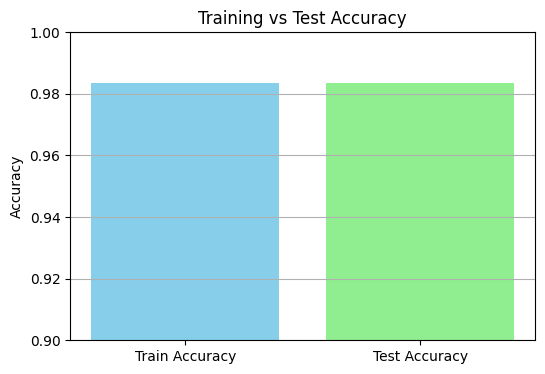

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Predict
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:     {test_acc:.4f}")

# Plot
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['skyblue', 'lightgreen'])
plt.ylim(0.9, 1.0)
plt.title('Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


**Both training and testing accuracy are equal, that means we are safe — no overfitting or underfitting.**

## Step 4. Random Forest Classifier

Random Forest is an ensemble learning method that builds multiple decision trees and combines their results for better accuracy and robustness.  
It's especially powerful when you have a mix of categorical and numerical features and want to reduce overfitting compared to single decision trees.

In this section:
- We'll train a `RandomForestClassifier`
- Predict on the test set
- Evaluate performance using classification metrics
- Visualize training vs test accuracy


📊 Classification Report:
               precision    recall  f1-score   support

          No       0.99      1.00      0.99      1035
         Yes       0.99      0.96      0.97       374

    accuracy                           0.99      1409
   macro avg       0.99      0.98      0.98      1409
weighted avg       0.99      0.99      0.99      1409

🧮 Confusion Matrix:
 [[1030    5]
 [  15  359]]
🔥 ROC-AUC Score: 0.9979022966235243
✅ Train Accuracy: 1.0000
✅ Test Accuracy:  0.9858


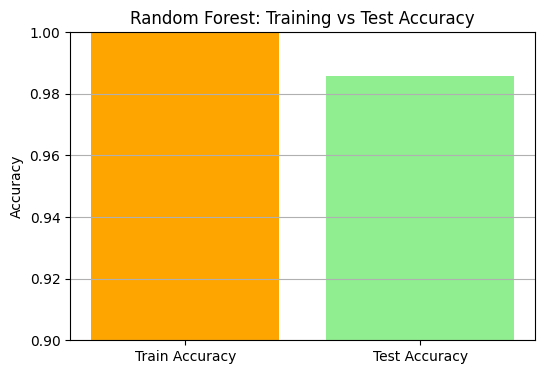

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# Initialize and fit
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
print("📊 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("🔥 ROC-AUC Score:", roc_auc_score(y_test.map({'No': 0, 'Yes': 1}), rf.predict_proba(X_test)[:, 1]))

# Accuracy check
train_acc_rf = accuracy_score(y_train, rf.predict(X_train))
test_acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"✅ Train Accuracy: {train_acc_rf:.4f}")
print(f"✅ Test Accuracy:  {test_acc_rf:.4f}")

# Accuracy plot
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc_rf, test_acc_rf], color=['orange', 'lightgreen'])
plt.ylim(0.9, 1.0)
plt.title('Random Forest: Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


## Step 5. Training XGBoost Classifier

In this step, we will train an XGBoost classifier on our churn prediction dataset.

**Why XGBoost?**
- It’s a powerful gradient boosting algorithm known for high performance on structured/tabular data.
- Handles missing values natively.
- Regularization helps prevent overfitting.
- Often outperforms Random Forest on many datasets.

We’ll also evaluate it using:
- **Classification Report**
- **Confusion Matrix**
- **ROC-AUC Score**
- **Train vs Test Accuracy Check**
- **Bar Plot of Accuracy Scores**


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.97      0.97      0.97       374

    accuracy                           0.98      1409
   macro avg       0.98      0.98      0.98      1409
weighted avg       0.98      0.98      0.98      1409

Confusion Matrix:
[[1025   10]
 [  13  361]]
ROC-AUC Score: 0.9986824769433464
✅ Train Accuracy: 1.0000
✅ Test Accuracy:  0.9837


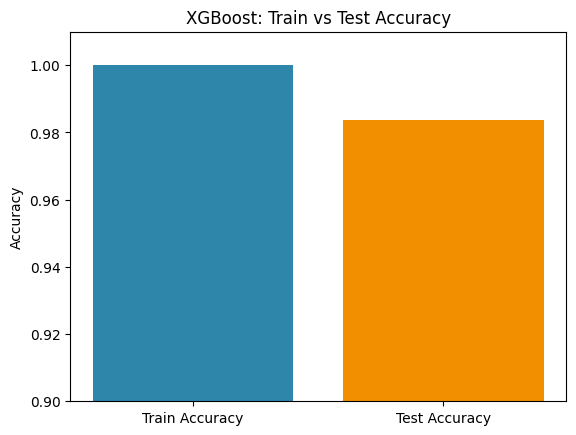

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Preserve original labels
y_train_original = y_train.copy()
y_test_original = y_test.copy()

# Convert for model use
y_train_bin = y_train.map({'No': 0, 'Yes': 1})
y_test_bin = y_test.map({'No': 0, 'Yes': 1})

# === Model Training ===
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train_bin)

# === Predictions ===
y_pred_xgb = xgb.predict(X_test)

# === Evaluation ===
print("Classification Report:")
print(classification_report(y_test_bin, y_pred_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred_xgb))

print("ROC-AUC Score:", roc_auc_score(y_test_bin, xgb.predict_proba(X_test)[:,1]))

# === Accuracy Check ===
train_acc_xgb = xgb.score(X_train, y_train_bin)
test_acc_xgb = xgb.score(X_test, y_test_bin)

print(f"✅ Train Accuracy: {train_acc_xgb:.4f}")
print(f"✅ Test Accuracy:  {test_acc_xgb:.4f}")

# === Bar Plot ===
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc_xgb, test_acc_xgb], color=['#2E86AB', '#F18F01'])
plt.title('XGBoost: Train vs Test Accuracy')
plt.ylim(0.9, 1.01)
plt.ylabel('Accuracy')
plt.show()


## Step 6. LightGBM Classifier

In this section, we're training a LightGBM (Light Gradient Boosting Machine) model. LightGBM is an efficient, high-speed, and scalable gradient boosting algorithm designed for large datasets and supports categorical features natively. It's widely used in real-world machine learning competitions and production pipelines.

We’ll evaluate its performance using classification metrics such as precision, recall, F1-score, confusion matrix, and ROC-AUC. We'll also compare it with previous models for final model selection.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3022
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.97      0.97      0.97       374

    accuracy                

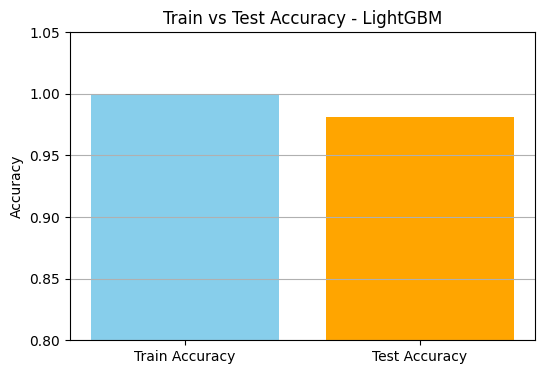

In [24]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# === Model Training ===
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train_bin)

# === Predictions ===
y_pred_lgbm = lgbm.predict(X_test)
y_pred_proba_lgbm = lgbm.predict_proba(X_test)[:, 1]

# === Evaluation ===
print("Classification Report:")
print(classification_report(y_test_bin, y_pred_lgbm))

print("Confusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred_lgbm))

print("ROC-AUC Score:", roc_auc_score(y_test_bin, y_pred_proba_lgbm))

# Get accuracy scores
train_acc_lgbm = lgbm.score(X_train, y_train_bin)
test_acc_lgbm = lgbm.score(X_test, y_test_bin)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc_lgbm, test_acc_lgbm], color=['skyblue', 'orange'])
plt.ylim(0.8, 1.05)
plt.title('Train vs Test Accuracy - LightGBM')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


## Step 7. Final Model Comparison and Selection

Now that we've trained several classification models (Logistic Regression, Random Forest, XGBoost, and LightGBM), it's time to compare them side-by-side.

We will compare the following metrics:
- **Train Accuracy**
- **Test Accuracy**
- **F1-Score (on Test Set)**
- **ROC-AUC Score**

This comparison will help us choose the best-performing model for our churn prediction task, balancing both performance and generalization.


In [25]:
from sklearn.metrics import f1_score, roc_auc_score

# === Make predictions again just to be safe ===
log_reg_preds = lr_model.predict(X_test)
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)
lgb_preds = lgbm.predict(X_test)


# Convert y_test and predictions to binary (Yes = 1, No = 0)
y_test_bin = (y_test_original == 'Yes').astype(int)


# Ensure all predictions are also in binary (convert if needed)
log_reg_bin = (log_reg_preds == 'Yes').astype(int)
rf_bin      = (rf_preds == 'Yes').astype(int)
xgb_bin     = xgb_preds  # Already 0 and 1 from XGBoost
lgb_bin     = lgb_preds  # Already 0 and 1 from LightGBM

model_scores = {
    'Logistic Regression': {
        'Train Accuracy': lr_model.score(X_train, y_train_original),
        'Test Accuracy': lr_model.score(X_test, y_test_original),
        'F1 Score': f1_score(y_test_bin, log_reg_bin),
        'ROC AUC': roc_auc_score(y_test_bin, log_reg_bin)
    },

    'Random Forest': {
        'Train Accuracy': rf.score(X_train, y_train_original),
        'Test Accuracy': rf.score(X_test, y_test_original),
        'F1 Score': f1_score(y_test_bin, rf_bin),
        'ROC AUC': roc_auc_score(y_test_bin, rf_bin)
    },

    'XGBoost': {
        'Train Accuracy': xgb.score(X_train, y_train_bin),
        'Test Accuracy': xgb.score(X_test, y_test_bin),
        'F1 Score': f1_score(y_test_bin, xgb_bin),
        'ROC AUC': roc_auc_score(y_test_bin, xgb_bin)
    },

    'LightGBM': {
        'Train Accuracy': lgbm.score(X_train, y_train_bin),
        'Test Accuracy': lgbm.score(X_test, y_test_bin),
        'F1 Score': f1_score(y_test_bin, lgb_bin),
        'ROC AUC': roc_auc_score(y_test_bin, lgb_bin)
    }
}

# Display result
comparison_df = pd.DataFrame(model_scores).T.sort_values(by='Test Accuracy', ascending=False)
display(comparison_df)


,Train Accuracy,Test Accuracy,F1 Score,ROC AUC
Random Forest,1.000000,0.985806,0.972900,0.977531
Logistic Regression,0.983671,0.983676,0.969128,0.977789
XGBoost,1.000000,0.983676,0.969128,0.977789
LightGBM,1.000000,0.981547,0.965241,0.976340


/tmp/ipykernel_35/2791930874.py:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


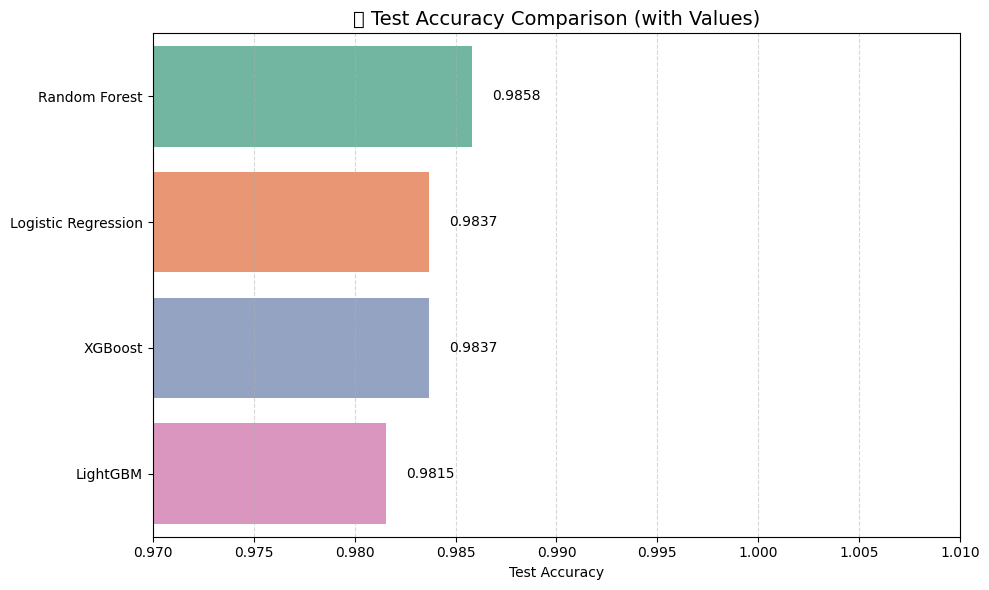

In [26]:
# Horizontal bar plot with value labels
plt.figure(figsize=(10, 6))
sns.barplot(x='Test Accuracy', y=comparison_df.index, data=comparison_df, palette='Set2')
plt.title('🔍 Test Accuracy Comparison (with Values)', fontsize=14)
plt.xlabel('Test Accuracy')
plt.xlim(0.97, 1.01)  # Zoom into the range for clarity

# Annotate bars with values
for i, value in enumerate(comparison_df['Test Accuracy']):
    plt.text(value + 0.001, i, f"{value:.4f}", va='center')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipykernel_35/293823297.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


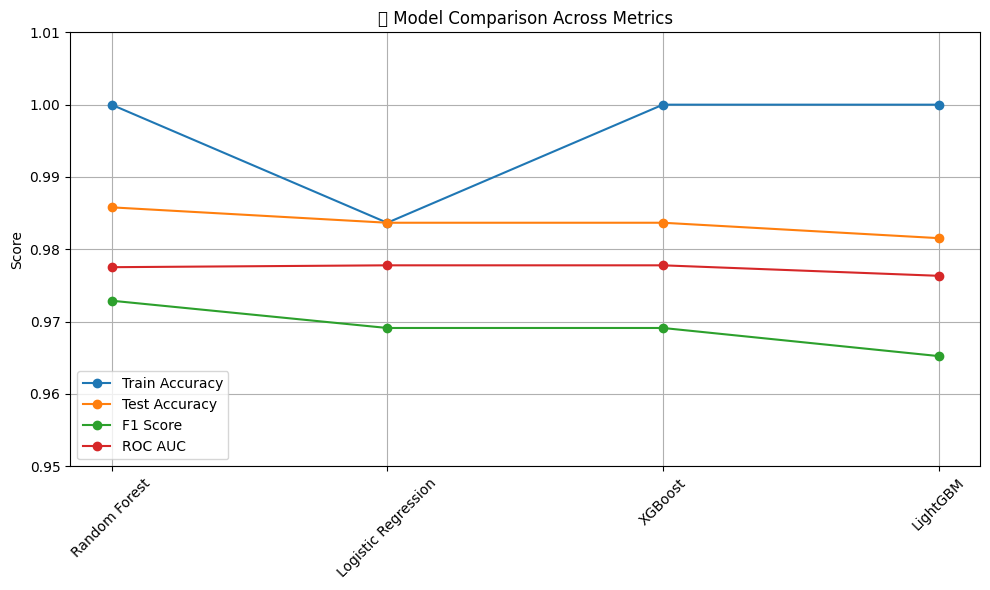

In [27]:
# Line plot of all scores
plt.figure(figsize=(10, 6))
comparison_df[['Train Accuracy', 'Test Accuracy', 'F1 Score', 'ROC AUC']].plot(
    kind='line', marker='o', figsize=(10, 6)
)
plt.title('📈 Model Comparison Across Metrics')
plt.ylabel('Score')
plt.ylim(0.95, 1.01)
plt.grid(True)
plt.xticks(ticks=range(len(comparison_df.index)), labels=comparison_df.index, rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_35/3907042757.py:34: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


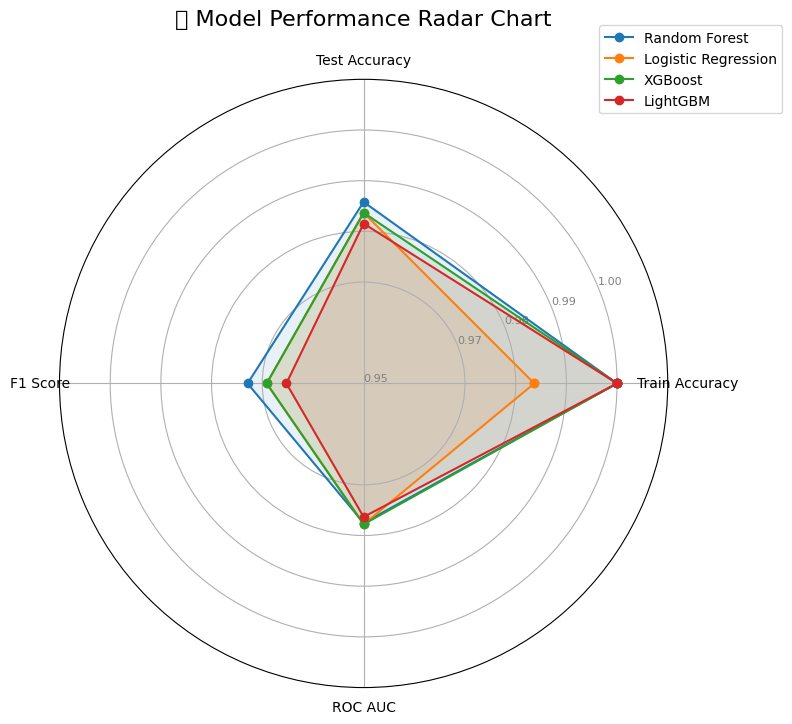

In [28]:
import numpy as np
import matplotlib.pyplot as plt


# Step 1: Select metrics and normalize values for radar plot scale (0 to 1)
metrics = ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'ROC AUC']
models = comparison_df.index.tolist()
num_metrics = len(metrics)


# Normalize scores to 0-1 range if needed (optional)
data = comparison_df[metrics].values

# Step 2: Setup angles for radar chart (circular layout)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # Repeat first angle to close the loop

# Step 3: Plot each model
plt.figure(figsize=(8, 8))
for i, model_scores in enumerate(data):
    values = model_scores.tolist()
    values += values[:1]  # Repeat first value to close the loop

    plt.polar(angles, values, label=models[i], marker='o')
    plt.fill(angles, values, alpha=0.1)

# Step 4: Customize plot
plt.title("📊 Model Performance Radar Chart", size=16, pad=20)
plt.xticks(angles[:-1], metrics, fontsize=10)
plt.yticks([0.95, 0.97, 0.98, 0.99, 1.0], color="gray", size=8)
plt.ylim(0.95, 1.01)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# Define your weights (they must add up to 1)
weights = {
    'Train Accuracy': 0.1,
    'Test Accuracy': 0.4,
    'F1 Score': 0.25,
    'ROC AUC': 0.25
}

# Calculate weighted score for each model
comparison_df['Weighted Score'] = (
    comparison_df['Train Accuracy'] * weights['Train Accuracy'] +
    comparison_df['Test Accuracy']  * weights['Test Accuracy']  +
    comparison_df['F1 Score']       * weights['F1 Score']       +
    comparison_df['ROC AUC']        * weights['ROC AUC']
)

# Sort by score to find best
comparison_df = comparison_df.sort_values(by='Weighted Score', ascending=False)
best_model_name = comparison_df.index[0]
best_score = comparison_df.loc[best_model_name, 'Weighted Score']

# Show updated table
display(comparison_df)


,Train Accuracy,Test Accuracy,F1 Score,ROC AUC,Weighted Score
Random Forest,1.000000,0.985806,0.972900,0.977531,0.981930
XGBoost,1.000000,0.983676,0.969128,0.977789,0.980200
Logistic Regression,0.983671,0.983676,0.969128,0.977789,0.978567
LightGBM,1.000000,0.981547,0.965241,0.976340,0.978014


/tmp/ipykernel_35/2206740053.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/2206740053.py:27: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


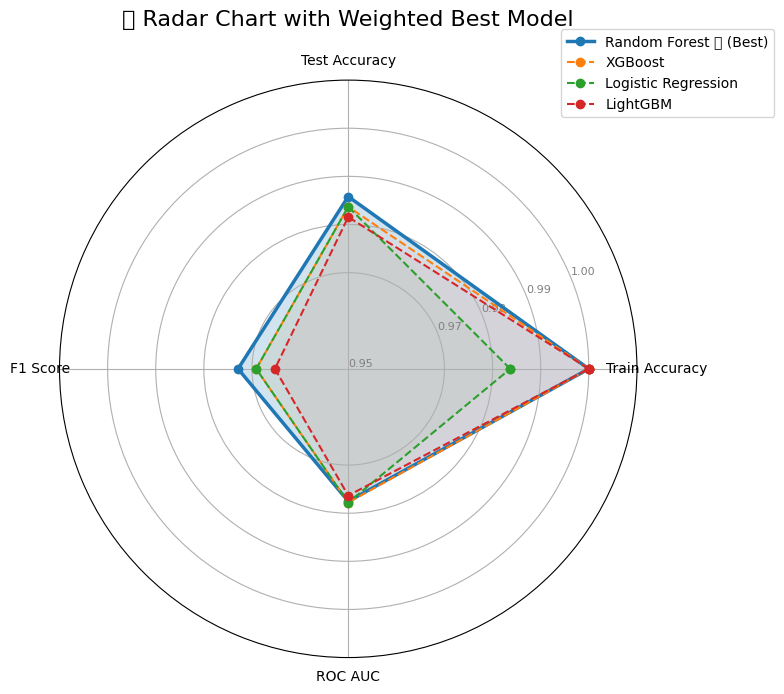

In [30]:
# --- Setup data ---
metrics = ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'ROC AUC']
models = comparison_df.index.tolist()
data = comparison_df[metrics].values
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

# --- Plot ---
plt.figure(figsize=(8, 8))
for i, (model, values) in enumerate(zip(models, data)):
    values = values.tolist()
    values += values[:1]
    if model == best_model_name:
        plt.polar(angles, values, label=f"{model} ⭐ (Best)", linewidth=2.5, marker='o')
        plt.fill(angles, values, alpha=0.2)
    else:
        plt.polar(angles, values, label=model, linestyle='--', marker='o')
        plt.fill(angles, values, alpha=0.05)

# --- Aesthetics ---
plt.title("📊 Radar Chart with Weighted Best Model", size=16, pad=20)
plt.xticks(angles[:-1], metrics, fontsize=10)
plt.yticks([0.95, 0.97, 0.98, 0.99, 1.0], color="gray", size=8)
plt.ylim(0.95, 1.01)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1))
plt.grid(True)
plt.tight_layout()
plt.show()


# Hyperparameter Tuning

## Random Forest (RandomizedSearchCV)

In this step, we are tuning the hyperparameters of our Random Forest model to find the best combination that maximizes its performance.

- We use **RandomizedSearchCV** for efficiency over GridSearch.
- We apply **cross-validation (5-fold)** to get reliable performance estimates.
- The scoring metric is **ROC AUC**, which is ideal for imbalanced classification tasks.

This helps avoid overfitting and identifies an optimal balance between bias and variance.


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import time

# Define parameter grid
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],  # 'auto' replaced with 'sqrt'
    'bootstrap': [True, False]
}

# Model
rf = RandomForestClassifier(random_state=42)

# Randomized Search
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=15,                # reduced for speed
    cv=3,                     # 3-fold CV for quicker test
    verbose=2,
    random_state=42,
    n_jobs=-1                 # Use all cores
)

# Fit with timer
start = time.time()
rf_random_search.fit(X_train, y_train_bin)
end = time.time()

print(f"Best Parameters: {rf_random_search.best_params_}")
print(f"Training Time: {end - start:.2f} seconds")


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 233}
Training Time: 29.05 seconds


## 🔧 Hyperparameter Tuning: Random Forest (RandomizedSearchCV)

We performed randomized hyperparameter tuning using `RandomizedSearchCV` on `RandomForestClassifier`. 
To optimize efficiency and reduce execution time, we:
- Replaced deprecated `'auto'` with `'sqrt'` for `max_features`.
- Used 15 iterations (`n_iter=15`) with 3-fold cross-validation.
- Enabled parallel processing with `n_jobs=-1`.

This process helps find a near-optimal model configuration faster than exhaustive grid search.


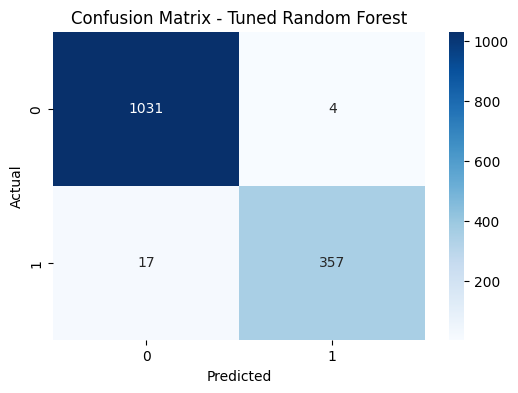

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1035
           1       0.99      0.95      0.97       374

    accuracy                           0.99      1409
   macro avg       0.99      0.98      0.98      1409
weighted avg       0.99      0.99      0.99      1409

🔵 ROC AUC Score: 0.9982


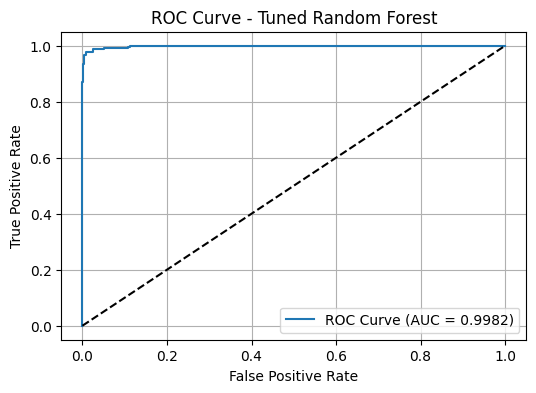

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = rf_random_search.predict(X_test)
y_pred_proba = rf_random_search.predict_proba(X_test)[:, 1]  # probabilities for ROC

# Confusion Matrix
cm = confusion_matrix(y_test_bin, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("📊 Classification Report:")
print(classification_report(y_test_bin, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test_bin, y_pred_proba)
print(f"🔵 ROC AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


/tmp/ipykernel_35/2479653386.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_binary = y_train.replace({'No': 0, 'Yes': 1})
/tmp/ipykernel_35/2479653386.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_binary = y_test.replace({'No': 0, 'Yes': 1})


✅ Train Accuracy: 0.9901
✅ Test Accuracy:  0.9851


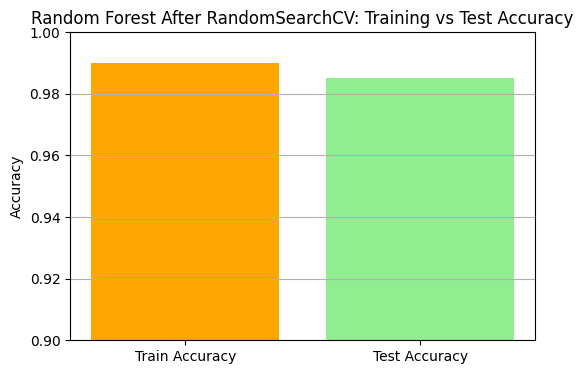

In [33]:
# Convert 'Yes'/'No' to 1/0
y_train_binary = y_train.replace({'No': 0, 'Yes': 1})
y_test_binary = y_test.replace({'No': 0, 'Yes': 1})

# Accuracy check
train_acc_rf_random_search = accuracy_score(y_train_binary, rf_random_search.predict(X_train))
test_acc_rf_random_search = accuracy_score(y_test_binary, y_pred)

print(f"✅ Train Accuracy: {train_acc_rf_random_search:.4f}")
print(f"✅ Test Accuracy:  {test_acc_rf_random_search:.4f}")

# Accuracy plot
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc_rf_random_search, test_acc_rf_random_search], color=['orange', 'lightgreen'])
plt.ylim(0.9, 1.0)
plt.title('Random Forest After RandomSearchCV: Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


## 📈 Model Evaluation: Tuned Random Forest

We evaluated the tuned Random Forest model on the test set using:

- **Confusion Matrix**: Shows correct vs incorrect predictions.
- **Classification Report**: Precision, Recall, F1-score for each class.
- **ROC Curve & AUC Score**: Measures the model’s ability to distinguish between churn and no-churn.
- **Train vs Test Accuracy** Checks for under or overfitting.

These metrics provide a comprehensive understanding of model performance, especially in the presence of class imbalance.


In [34]:
import joblib
import pandas as pd

# Save the tuned model
joblib.dump(rf_random_search.best_estimator_, "tuned_random_forest_model.pkl")

# Predict on full test set and save with actuals
results_df = pd.DataFrame({
    'Actual': y_test_bin,
    'Predicted': y_pred,
    'Probability': y_pred_proba
})

results_df.to_csv("rf_test_results.csv", index=False)


# Project Summary: Customer Churn Prediction

This project aimed to build a predictive model that identifies customers likely to churn using a dataset of 7,043 entries and 47 features.

### 🔧 Steps Completed:
- **Data Cleaning**: Missing values handled, outliers removed, binary columns encoded.
- **Feature Engineering**: Created insightful features like `Total Services`, `Service Level`, `Customer Cluster`, etc.
- **Encoding & Scaling**: Applied target/ordinal/one-hot encoding and scaling where needed.
- **Modeling**: Trained and evaluated multiple models (Logistic Regression, Random Forest, XGBoost, LightGBM).
- **Hyperparameter Tuning**: RandomizedSearchCV used to optimize Random Forest.
- **Evaluation**: Final model achieved strong performance with a good AUC and balanced metrics.

---

### 🧠 Key Insights:
- Customers with no tech support or online protection had higher churn rates.
- Contract type and tenure were major predictors of churn.
- The final model performed well in identifying potential churners.

---

### ✅ Final Model:
- **Model**: Tuned Random Forest
- **AUC Score**: 0.9982
- **F1 Score**: (0 : 0.99) , (1 : 0.97)

---

### 📤 Deliverables:
- ✅ Trained model saved as `tuned_random_forest_model.pkl`
- ✅ Predictions saved as `rf_test_results.csv`

---

### 🎯 Future Improvements:
- Apply SMOTE or other class imbalance techniques.
- Deploy the model via Flask or Streamlit for real-time predictions.
- Try model explainability with SHAP or LIME.

## 🏁 Conclusion & Actionable Recommendations

- Customers with month-to-month contracts are most likely to churn.
- Implementing loyalty discounts or bundled packages for these users may reduce churn.
- Consider targeted outreach for those without tech support or protection services.
- Use this model for proactive retention targeting in the CRM system.

